In [26]:
# This code is kinda a mess, the first few blocks are designed to create the classification that is used
# to make the interactive plot and then to create the .png images of different viewpoint's kinematic maps,
# which are also used to create the interactive figure

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from scipy.signal import argrelextrema
import sklearn.metrics as metrics

from sklearn.preprocessing import LabelEncoder

def locate_min(a):
        smallest = min(a)
        return smallest, [index for index, element in enumerate(a) 
                      if smallest == element]
def dPA_va(row):
    return row['Delta PA']*row['v_asym']
def dPA_sa(row):
    return row['Delta PA']*row['s_asym']
def dPA_resids(row):
    return row['Delta PA']*row['resids']
def dPA_lambdar(row):
    return row['Delta PA']*row['lambda_r']
def dPA_epsilon(row):
    return row['Delta PA']*row['epsilon']
def dPA_A2(row):
    return row['Delta PA']*row['A_2']
def dPA_deltapos(row):
    return row['Delta PA']*row['deltapos']
def dPA_deltapos2(row):
    return row['Delta PA']*row['deltapos2']

def va_sa(row):
    return row['v_asym']*row['s_asym']
def va_resids(row):
    return row['v_asym']*row['resids']
def va_lambdar(row):
    return row['v_asym']*row['lambda_r']
def va_epsilon(row):
    return row['v_asym']*row['epsilon']
def va_A2(row):
    return row['v_asym']*row['A_2']
def va_deltapos(row):
    return row['v_asym']*row['deltapos']
def va_deltapos2(row):
    return row['v_asym']*row['deltapos2']


def sa_resids(row):
    return row['s_asym']*row['resids']
def sa_lambdar(row):
    return row['s_asym']*row['lambda_r']
def sa_epsilon(row):
    return row['s_asym']*row['epsilon']
def sa_A2(row):
    return row['s_asym']*row['A_2']
def sa_deltapos(row):
    return row['s_asym']*row['deltapos']
def sa_deltapos2(row):
    return row['s_asym']*row['deltapos2']



def resids_lambdar(row):
    return row['resids']*row['lambda_r']
def resids_epsilon(row):
    return row['resids']*row['epsilon']
def resids_A2(row):
    return row['resids']*row['A_2']
def resids_deltapos(row):
    return row['resids']*row['deltapos']
def resids_deltapos2(row):
    return row['resids']*row['deltapos2']

def lambdar_epsilon(row):
    return row['lambda_r']*row['epsilon']
def lambdar_A2(row):
    return row['lambda_r']*row['A_2']
def lambdar_deltapos(row):
    return row['lambda_r']*row['deltapos']
def lambdar_deltapos2(row):
    return row['lambda_r']*row['deltapos2']

def epsilon_A2(row):
    return row['epsilon']*row['A_2']
def epsilon_deltapos(row):
    return row['epsilon']*row['deltapos']
def epsilon_deltapos2(row):
    return row['epsilon']*row['deltapos2']

def A2_deltapos(row):
    return row['A_2']*row['deltapos']
def A2_deltapos2(row):
    return row['A_2']*row['deltapos2']

def deltapos_deltapos2(row):
    return row['deltapos']*row['deltapos2']



import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from scipy.signal import argrelextrema
import sklearn.metrics as metrics
  





feature_dict = {i:label for i,label in zip(
                range(13),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                'Delta PA',
                  'v_asym',
                  's_asym',
                  'resids',
                  'lambda_r',
                  'epsilon',
                  'A',
                  'A_2',
                  'deltapos',
                  'deltapos2'))}
def group_consecutives(vals, step=1):
    """Return list of consecutive lists of numbers from vals (number list)."""
    run = []
    result = [run]
    expect = None
    for v in vals:
        if (v == expect) or (expect is None):
            run.append(v)
        else:
            run = [v]
            result.append(run)
        expect = v + step
    return result


this is the filepath LDA_kin_fg3_m12_degraded.txt


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [0.39, 0.59, 0.78, 0.98, 1.17, 1.37, 1.56, 1.66, 1.76, 1.81, 1.86, 1.91, 2.0, 2.05, 2.15, 2.2, 2.25, 2.35, 2.44, 2.54, 2.59]
myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, 1.96, 2.69, 2.79, 3.62, 4.6, 5.18, 5.57, 6.06]


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

m 10.1 10.413274595042155
terms before adding in necessary ['dPA*epsilon' 's_asym' 'epsilon*deltapos2' 'epsilon' 'Delta PA' 'v_asym'
 'resids' 'lambdar*deltapos' 'va*resids' 'deltapos2' 'resids*lambdar'
 'deltapos' 'lambda_r' 'A2*deltapos2' 'A_2']
fg3_m12_degraded &
coefficients [[ 0.75612549  0.28279291  0.77247417  0.48737999 -0.70244559  0.52967323
   0.08460253 -1.78887358 -0.04513053 -0.40701458  0.28579686  1.43059368
  -1.45745249 -0.54436447  0.42238745]]
coefficient std [[0.04905409 0.06925144 0.13518771 0.09476254 0.08021357 0.0669121
  0.23914879 0.35698592 0.10480034 0.1702712  0.19949638 0.35941153
  0.18445745 0.12370746 0.0764882 ]]
sorted inputs ['va*resids' 'resids' 's_asym' 'resids*lambdar' 'deltapos2' 'A_2'
 'epsilon' 'v_asym' 'A2*deltapos2' 'Delta PA' 'dPA*epsilon'
 'epsilon*deltapos2' 'deltapos' 'lambda_r' 'lambdar*deltapos']
coeff [-0.04513053  0.08460253  0.28279291  0.28579686 -0.40701458  0.42238745
  0.48737999  0.52967323 -0.54436447 -0.70244559  0.75612549  

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1222: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1223: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


DECISION BOUNDARY -2.196695143559791 fg3_m12_degraded
myr [0.39, 0.59, 0.78, 0.98, 1.17, 1.37, 1.56, 1.66, 1.76, 1.81, 1.86, 1.91, 2.0, 2.05, 2.15, 2.2, 2.25, 2.35, 2.44, 2.54, 2.59]
[14]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

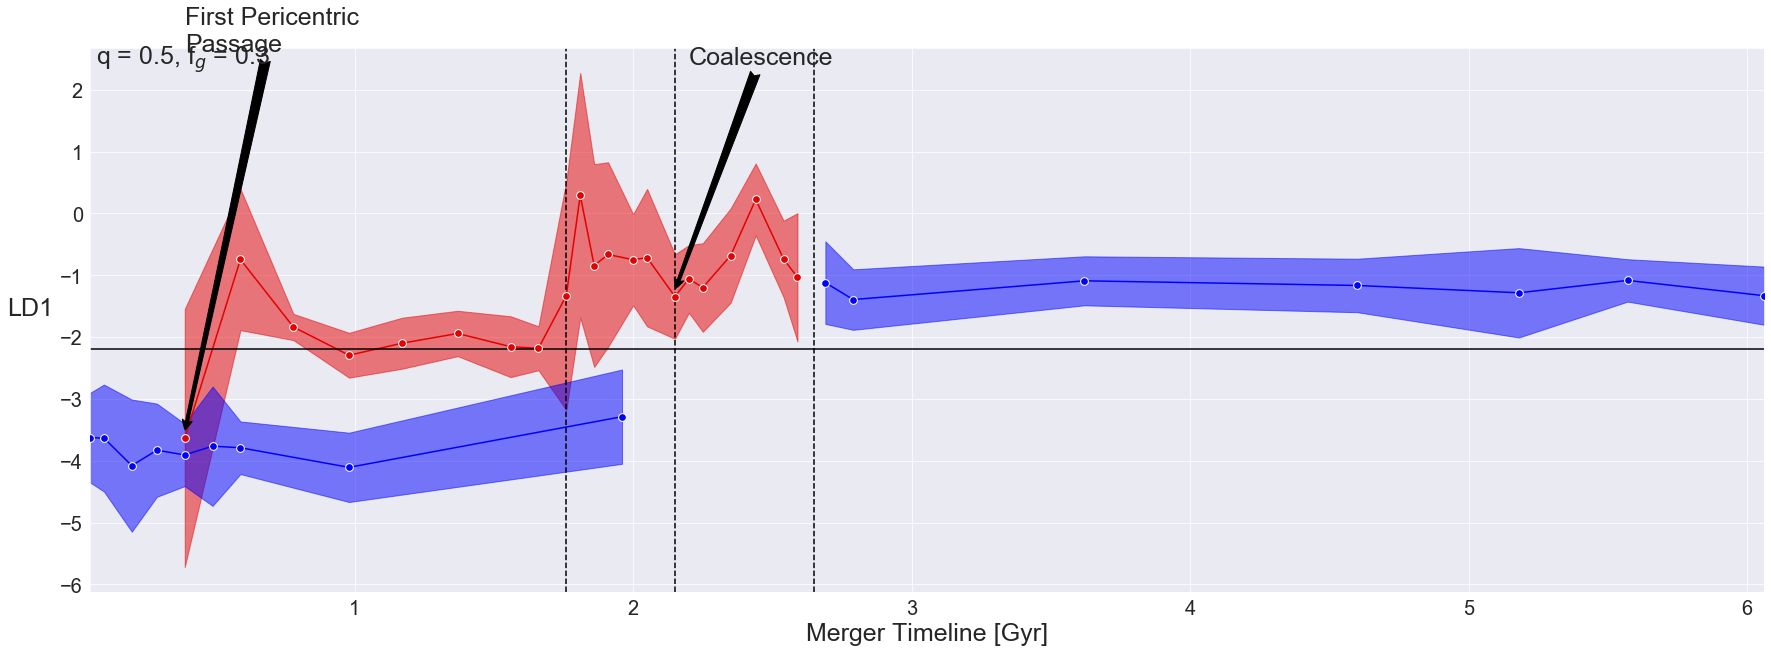

In [28]:
# Right now I'm just running the classification for one simulation
# but the eventual goal is to create some sort of loop that will
# produce different tabs in the interactive plot for each different
# simulation (I think this won't be too hard)

list_runs=['fg3_m12_degraded']
colors=[sns.xkcd_rgb["red"]]
names=['q0.5_fg0.3']

priors_list=[[0.9,0.1]]
vers_list=['']
images=''

plt.clf()
missclass_list=[]


LDA_time=[]
myr_total=[]


num_comps_list=[]
missclass_list_1=[]
missclass_list_1_e=[]
min_comps_list=[]
min_A_list=[]

dPA_means_all=[]
va_means_all=[]
color_means_all=[]
sa_means_all=[]
resids_means_all=[]
lambdar_means_all=[]
epsilon_means_all=[]

A2_means_all=[]
deltapos_means_all=[]
deltapos2_means_all=[]

dPA_means_all_non=[]
va_means_all_non=[]
color_means_all_non=[]
sa_means_all_non=[]
resids_means_all_non=[]
lambdar_means_all_non=[]
epsilon_means_all_non=[]

A2_means_all_non=[]
deltapos_means_all_non=[]
deltapos2_means_all_non=[]

for i in range(len(list_runs)):
    #i=i+1
    add_on=list_runs[i]
    
    vers = vers_list[i]
    
    
        
    run=list_runs[i]
    print('this is the filepath', 'LDA_kin_'+str(vers)+str(images)+str(run)+'.txt')

    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_kin_'+str(vers)+str(images)+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )
    
    
    #df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

    df.dropna(how="all", inplace=True) # to drop the empty line at file-end


    for j in range(len(df)):
        if df[['Myr']].values[j][0]<0.39:#df[['Myr']].values[i][0]
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg3_m12' and (df[['Myr']].values[j][0]-2.15) > 0.5:#0.39+0.1:#was 0.39
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg1_m13' and (df[['Myr']].values[j][0]-2.74) > 0.5:#2.74-2.25+2.74:#was 0.39
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg3_m13' and (df[['Myr']].values[j][0]-2.59) > 0.5:#2.64+0.5
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg3_m15' and (df[['Myr']].values[j][0]-3.72) > 0.5:
            df.set_value(j,'class label',0)
        if add_on[:9]=='fg3_m1_10' and (df[['Myr']].values[j][0]-9.17) > 0.5:
            df.set_value(j,'class label',0)
        if add_on[:9]=='major_all':
            #then sort by image name
            if df[['Image']].values[j][0][:7]=='fg3_m12' and (df[['Myr']].values[j][0]-2.15) > 0.5:#q0.5_fg0.3
                df.set_value(j,'class label',0)
            if df[['Image']].values[j][0][:7]=='fg1_m13' and (df[['Myr']].values[j][0]-2.59) > 0.5:
                df.set_value(j,'class label',0)
            if df[['Image']].values[j][0][:7]=='fg3_m13' and (df[['Myr']].values[j][0]-2.74) > 0.5:
                df.set_value(j,'class label',0)
        if add_on[:9]=='minor_all':
            #then sort by image name
            if df[['Image']].values[j][0][:7]=='fg3_m15' and (df[['Myr']].values[j][0]-3.72) > 0.5:
                df.set_value(j,'class label',0)
            if df[['Image']].values[j][0][:7]=='fg3_m10' and (df[['Myr']].values[j][0]-9.17) > 0.5:
                df.set_value(j,'class label',0)
            
      

    myr=[]
    myr_non=[]
    for j in range(len(df)):
        if df[['class label']].values[j][0]==0.0:
            myr_non.append(df[['Myr']].values[j][0])
        else:
            myr.append(df[['Myr']].values[j][0])

    myr_non=sorted(list(set(myr_non)))
    myr=sorted(list(set(myr)))



    print('myr', myr)
    print('myr_non', myr_non)
        
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    

    
    
    df['dPA*va'] = df.apply(dPA_va,axis=1)
    df['dPA*sa'] = df.apply(dPA_sa,axis=1)
    df['dPA*resids'] = df.apply(dPA_resids,axis=1)
    df['dPA*lambdar'] = df.apply(dPA_lambdar,axis=1)
    df['dPA*epsilon'] = df.apply(dPA_epsilon,axis=1)
    df['dPA*A2'] = df.apply(dPA_A2,axis=1)
    df['dPA*deltapos'] = df.apply(dPA_deltapos,axis=1)
    df['dPA*deltapos2'] = df.apply(dPA_deltapos2,axis=1)
    
    df['va*sa'] = df.apply(va_sa,axis=1)
    df['va*resids'] = df.apply(va_resids,axis=1)
    df['va*lambdar'] = df.apply(va_lambdar,axis=1)
    df['va*epsilon'] = df.apply(va_epsilon,axis=1)
    df['va*A2'] = df.apply(va_A2,axis=1)
    df['va*deltapos'] = df.apply(va_deltapos,axis=1)
    df['va*deltapos2'] = df.apply(va_deltapos2,axis=1)
    
    
    df['sa*resids'] = df.apply(sa_resids,axis=1)
    df['sa*lambdar'] = df.apply(sa_lambdar,axis=1)
    df['sa*epsilon'] = df.apply(sa_epsilon,axis=1)
    df['sa*A2'] = df.apply(sa_A2,axis=1)
    df['sa*deltapos'] = df.apply(sa_deltapos,axis=1)
    df['sa*deltapos2'] = df.apply(sa_deltapos2,axis=1)
    
    
    df['resids*lambdar'] = df.apply(resids_lambdar,axis=1)
    df['resids*epsilon'] = df.apply(resids_epsilon,axis=1)
    df['resids*A2'] = df.apply(resids_A2,axis=1)
    df['resids*deltapos'] = df.apply(resids_deltapos,axis=1)
    df['resids*deltapos2'] = df.apply(resids_deltapos2,axis=1)
    
    
    df['lambdar*epsilon'] = df.apply(lambdar_epsilon,axis=1)
    df['lambdar*A2'] = df.apply(lambdar_A2,axis=1)
    df['lambdar*deltapos'] = df.apply(lambdar_deltapos,axis=1)
    df['lambdar*deltapos2'] = df.apply(lambdar_deltapos2,axis=1)
    
    
    df['epsilon*A2'] = df.apply(epsilon_A2,axis=1)
    df['epsilon*deltapos'] = df.apply(epsilon_deltapos,axis=1)
    df['epsilon*deltapos2'] = df.apply(epsilon_deltapos2,axis=1)
    
    df['A2*deltapos'] = df.apply(A2_deltapos,axis=1)
    df['A2*deltapos2'] = df.apply(A2_deltapos2,axis=1)
    
    df['deltapos*deltapos2'] = df.apply(deltapos_deltapos2,axis=1)
    
    


    
    
    
    '''First, do a bunch of diagnostic plotting :)'''
    X= df[['Delta PA','v_asym','s_asym', 'resids','lambda_r', 'epsilon','A_2','deltapos','deltapos2']].values
    
    
    dPA = {key:[] for key in myr}
    va = {key:[] for key in myr}
    sa = {key:[] for key in myr}
    resids = {key:[] for key in myr}
    lambdar = {key:[] for key in myr}
    epsilon = {key:[] for key in myr}
    A2 = {key:[] for key in myr}
    deltapos = {key:[] for key in myr}
    deltapos2 = {key:[] for key in myr}
    
    
    
    dPA_std = {key:[] for key in myr}
    va_std = {key:[] for key in myr}
    sa_std = {key:[] for key in myr}
    resids_std = {key:[] for key in myr}
    lambdar_std = {key:[] for key in myr}
    epsilon_std = {key:[] for key in myr}
    A2_std = {key:[] for key in myr}
    deltapos_std = {key:[] for key in myr}
    deltapos2_std = {key:[] for key in myr}
    

    dPA_non = {key:[] for key in myr_non}
    va_non = {key:[] for key in myr_non}
    sa_non = {key:[] for key in myr_non}
    resids_non = {key:[] for key in myr_non}
    lambdar_non = {key:[] for key in myr_non}
    epsilon_non = {key:[] for key in myr_non}
    A2_non = {key:[] for key in myr_non}
    deltapos_non = {key:[] for key in myr_non}
    deltapos2_non = {key:[] for key in myr_non}

    
        
    color_name_non = {key:[] for key in myr_non}
    color_name = {key:[] for key in myr}
    
    marker_name_non = {key:[] for key in myr_non}
    marker_name = {key:[] for key in myr}


    epsilon_all=[]
    epsilon_all_non=[]
    vasym_all=[]
    vasym_all_non=[]
    
    for l in range(len(df)):
        if df[['class label']].values[l]==0:
            
            epsilon_all_non.append(X[l,5])
            vasym_all_non.append(X[l,1])
            
            dPA_non[df[['Myr']].values[l][0]].append(X[l,0])
            va_non[df[['Myr']].values[l][0]].append(X[l,1])
            sa_non[df[['Myr']].values[l][0]].append(X[l,2])
            resids_non[df[['Myr']].values[l][0]].append(X[l,3])
            lambdar_non[df[['Myr']].values[l][0]].append(X[l,4])
            epsilon_non[df[['Myr']].values[l][0]].append(X[l,5])
            A2_non[df[['Myr']].values[l][0]].append(X[l,6])
            deltapos_non[df[['Myr']].values[l][0]].append(X[l,7])
            deltapos2_non[df[['Myr']].values[l][0]].append(X[l,8])
            
            
            #color_non[df[['Myr']].values[l][0]].append(df[['']])
            #print('concentration here', df[['Concentration (C)']].values[i][0])
        else:
            epsilon_all.append(X[l,5])
            vasym_all.append(X[l,1])
            
            dPA[df[['Myr']].values[l][0]].append(X[l,0])
            va[df[['Myr']].values[l][0]].append(X[l,1])
            sa[df[['Myr']].values[l][0]].append(X[l,2])
            resids[df[['Myr']].values[l][0]].append(X[l,3])
            lambdar[df[['Myr']].values[l][0]].append(X[l,4])
            epsilon[df[['Myr']].values[l][0]].append(X[l,5])
            A2[df[['Myr']].values[l][0]].append(X[l,6])
            deltapos[df[['Myr']].values[l][0]].append(X[l,7])
            deltapos2[df[['Myr']].values[l][0]].append(X[l,8])
            
    #list1, list2, list3, list4 = ([] for i in range(4))  
    dPA_list_all_non, va_list_all_non, sa_list_all_non, resids_list_all_non, lambdar_list_all_non,epsilon_list_all_non,A2_list_all_non,deltapos_list_all_non,deltapos2_list_all_non,color_list_all_non=([] for i in range(10))
    

    dPA_list_all,va_list_all,sa_list_all,resids_list_all,lambdar_list_all,epsilon_list_all,A2_list_all,deltapos_list_all,deltapos2_list_all,color_list_all=([] for i in range(10))

    dPA_means_non,va_means_non,sa_means_non,resids_means_non,lambdar_means_non,epsilon_means_non,A2_means_non,deltapos_means_non,deltapos2_means_non,color_means_non=([] for i in range(10))
    
    
    
    counter_overall_non=0
    
    for k in range(len(dPA_non)):
        for z in range(len(dPA_non[myr_non[k]])):
            counter_overall_non+=1
            dPA_list_all_non.append((dPA_non[myr_non[k]][z]))
            va_list_all_non.append((va_non[myr_non[k]][z]))
            sa_list_all_non.append((sa_non[myr_non[k]][z]))
            
            resids_list_all_non.append((resids_non[myr_non[k]][z]))
            
            lambdar_list_all_non.append((lambdar_non[myr_non[k]][z]))
            epsilon_list_all_non.append((epsilon_non[myr_non[k]][z]))
            A2_list_all_non.append((A2_non[myr_non[k]][z]))
            deltapos_list_all_non.append((deltapos_non[myr_non[k]][z]))
            deltapos2_list_all_non.append((deltapos2_non[myr_non[k]][z]))
            
            color_list_all_non.append(myr_non[k]/1)
            
         
        dPA_means_non.append(np.mean(dPA_non[myr_non[k]][:]))
        va_means_non.append(np.mean(va_non[myr_non[k]][:]))
        sa_means_non.append(np.mean(sa_non[myr_non[k]][:]))
        resids_means_non.append(np.mean(resids_non[myr_non[k]][:]))
        
        lambdar_means_non.append(np.mean(lambdar_non[myr_non[k]][:]))
        epsilon_means_non.append(np.mean(epsilon_non[myr_non[k]][:]))
        A2_means_non.append(np.mean(A2_non[myr_non[k]][:]))
        deltapos_means_non.append(np.mean(deltapos_non[myr_non[k]][:]))
        deltapos2_means_non.append(np.mean(deltapos2_non[myr_non[k]][:]))
        
        
        
        color_means_non.append((myr_non[k]))
        
    dPA_means=[]
    va_means=[]
    sa_means=[]
    resids_means=[]
    lambdar_means=[]
    epsilon_means=[]
    A2_means=[]
    deltapos_means=[]
    deltapos2_means=[]
    color_means=[]
    
    counter_overall=0
  
    for k in range(len(dPA)):
        for z in range(len(dPA[myr[k]])):
            counter_overall+=1
            dPA_list_all.append((dPA[myr[k]][z]))
            va_list_all.append((va[myr[k]][z]))
            sa_list_all.append((sa[myr[k]][z]))
            lambdar_list_all.append((lambdar[myr[k]][z]))
            epsilon_list_all.append((epsilon[myr[k]][z]))
            A2_list_all.append((A2[myr[k]][z]))
            deltapos_list_all.append((deltapos[myr[k]][z]))
            deltapos2_list_all.append((deltapos2[myr[k]][z]))
            color_list_all.append((myr[k]))
            
        dPA_means.append(np.mean(dPA[myr[k]][:]))
        va_means.append(np.mean(va[myr[k]][:]))
        sa_means.append(np.mean(sa[myr[k]][:]))
        resids_means.append(np.mean(resids[myr[k]][:]))
        lambdar_means.append(np.mean(lambdar[myr[k]][:]))
        epsilon_means.append(np.mean(epsilon[myr[k]][:]))
        A2_means.append(np.mean(A2[myr[k]][:]))
        deltapos_means.append(np.mean(deltapos[myr[k]][:]))
        deltapos2_means.append(np.mean(deltapos2[myr[k]][:]))
        color_means.append((myr[k]/1))

    
    dPA_means_all.append(dPA_means)
    va_means_all.append(va_means)
    sa_means_all.append(sa_means)
    resids_means_all.append(resids_means)
    lambdar_means_all.append(lambdar_means)
    epsilon_means_all.append(epsilon_means)
    A2_means_all.append(A2_means)
    deltapos_means_all.append(deltapos_means)
    deltapos2_means_all.append(deltapos2_means)
    color_means_all.append(color_means)
    
    
    dPA_means_all_non.append(dPA_means_non)
    va_means_all_non.append(va_means_non)
    sa_means_all_non.append(sa_means_non)
    resids_means_all_non.append(resids_means_non)
    lambdar_means_all_non.append(lambdar_means_non)
    epsilon_means_all_non.append(epsilon_means_non)
    A2_means_all_non.append(A2_means_non)
    deltapos_means_all_non.append(deltapos_means_non)
    deltapos2_means_all_non.append(deltapos2_means_non)
    color_means_all_non.append(color_means_non)
    
    
    '''Now I would love to run some OLS to find R^2 values etc'''
    from sklearn import datasets, linear_model, feature_selection
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.model_selection import train_test_split
    
    
    
    
    
    y = df['class label'].values
    
    
    X= df[['Delta PA','v_asym','s_asym', 'resids','lambda_r', 'epsilon','A','A_2','deltapos','deltapos2']].values
    #std_scale = preprocessing.StandardScaler().fit(X)
    #X = std_scale.transform(X)

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1
    label_dict = {1: 'Nonmerger', 2: 'Merger'}




    
    
    #X= df[['Delta PA','s_asym', 'resids','lambda_r', 'epsilon','A_2']].values
    
    y = df['class label'].values
    
    
    
    
    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y)


    
    
    
     

    
    
    '''Make the beautiful list of colors'''
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for k in range(len(tableau20)):    
        r, g, b = tableau20[k]    
        tableau20[k] = (r / 255., g / 255., b / 255.)    


    
    import seaborn
    sns.set_style("darkgrid")
    
 
    
    
    ct_1=['Delta PA','Delta PA','Delta PA','Delta PA','Delta PA','Delta PA','Delta PA','Delta PA',
          'v_asym','v_asym','v_asym','v_asym','v_asym','v_asym','v_asym',
      's_asym','s_asym','s_asym','s_asym','s_asym','s_asym',
      'resids','resids','resids','resids','resids',
      'lambda_r','lambda_r','lambda_r','lambda_r',
         'epsilon','epsilon','epsilon',
         'A_2','A_2',
         'deltapos']
    ct_2=['v_asym','s_asym','resids','lambda_r','epsilon','A_2','deltapos','deltapos2',
      's_asym','resids','lambda_r','epsilon','A_2','deltapos','deltapos2',
      'resids','lambda_r','epsilon','A_2','deltapos','deltapos2',
      'lambda_r','epsilon','A_2','deltapos','deltapos2',
        'epsilon', 'A_2','deltapos','deltapos2',
         'A_2','deltapos','deltapos2',
         'deltapos','deltapos2',
         'deltapos2']
    term=['dPA*va','dPA*sa','dPA*resids','dPA*lambdar','dPA*epsilon','dPA*A2','dPA*deltapos','dPA*deltapos2',
            'va*resids','va*resids','va*lambdar','va*epsilon','va*A2','va*deltapos','va*deltapos2',
          'sa*resids','sa*lambdar','sa*epsilon','sa*A2','sa*deltapos','sa*deltapos2',
           'resids*lambdar','resids*epsilon','resids*A2','resids*deltapos','resids*deltapos2',
           'lambdar*epsilon','lambdar*A2','lambdar*deltapos','lambdar*deltapos2',
           'epsilon*A2','epsilon*deltapos','epsilon*deltapos2',
         'A2*deltapos','A2*deltapos2',
         'deltapos*deltapos2']

    
    
    
    inputs=['Delta PA','v_asym','s_asym','resids','lambda_r','epsilon','A_2','deltapos','deltapos2',
            'dPA*va','dPA*sa','dPA*resids','dPA*lambdar','dPA*epsilon','dPA*A2','dPA*deltapos','dPA*deltapos2',
            'va*sa','va*resids','va*lambdar','va*epsilon','va*A2','va*deltapos','va*deltapos2',
            'sa*resids','sa*lambdar','sa*epsilon','sa*A2','sa*deltapos','sa*deltapos2',
           'resids*lambdar','resids*epsilon','resids*A2','resids*deltapos','resids*deltapos2',
           'lambdar*epsilon','lambdar*A2','lambdar*deltapos','lambdar*deltapos2',
           'epsilon*A2','epsilon*deltapos','epsilon*deltapos2',
           'A2*deltapos','A2*deltapos2',
           'deltapos*deltapos2']
    
    
    
    OG_length=len(inputs)
    
    prev_input=[]
    prev_input_here=[]
    missclass=[]
    missclass_e=[]
    num_comps=[]
    list_coef=[]
    list_coef_std=[]
    list_inter=[]
    list_inter_std=[]
    list_master=[]
    list_master_confusion=[]
    list_classes=[]
    kf_choose=[]
    
    
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)
    
    for o in range(len(inputs)):#len(inputs)-20):
    
        coef_mean=[]
        coef_std=[]
        inter_mean=[]
        inter_std=[]
        coef_mean_std=[]
        accuracy=[]
        accuracy_e=[]
        inputs_this_step=[]
        confusion_master_this_step=[]
        master_this_step=[]
        classes_this_step=[]
        score_ANN=[]
        kf_list=[]
        


        #Now inputs is changing and you need to go through and choose a variable
        for k in range(len(inputs)):#Search through every one
            
            prev_input.append(inputs[k])
            inputs_here=[]
            inputs_here.append(inputs[k])
            
            #print('starting input', prev_input,inputs[k])
            #if inputs[k] is a cross term and the prev_input doesn't contain it, add it:
            for m in range(len(term)):
                if inputs[k]==term[m]:
                    #then you are going to search every term of prev_input and see if it is there
                    #for n in range(len(prev_input)):
                    if ct_1[m] not in prev_input:
                        prev_input.append(ct_1[m])
                        
                        inputs_here.append(ct_1[m])
                    if ct_2[m] not in prev_input:
                        prev_input.append(ct_2[m])
                        inputs_here.append(ct_2[m])
                        
                    
            #print('inputs heading into LDA',prev_input)
            
            X = df[prev_input].values
            
            
            




            y = df['class label'].values

            from sklearn import preprocessing



            std_scale = preprocessing.StandardScaler().fit(X)
            X = std_scale.transform(X)


            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            y = label_encoder.transform(y) + 1


            label_dict = {1: 'NonMerger', 2: 'Merger'}
            from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

            # LDA
            sklearn_lda = LDA(solver='svd',priors=priors_list[i], store_covariance=True)#store_covariance=False


            X_lda_sklearn = sklearn_lda.fit_transform(X, y)

            dec = sklearn_lda.score(X,y)
            prob = sklearn_lda.predict_proba(X)

            coef = sklearn_lda.coef_





            
    
            kf.get_n_splits(X, y)
            kf_list.append(kf.split(X,y))



            coef_list=[]
            inter_list=[]
            classes_list=[]
            confusion_master=[]
            y_test_master=[]
            pred_master=[]
            single_prediction=[]
            score=[]
            count=0
            for train_index, test_index in kf.split(X, y):

                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                
                
                
                



                sklearn_lda = LDA( solver='svd',priors=priors_list[i],store_covariance=True)#store_covariance=False
            


                X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
                coef = sklearn_lda.coef_
                inter = sklearn_lda.intercept_

                inter_list.append(inter)
                coef_list.append(coef)
                inter_list.append(inter)
                pred =sklearn_lda.predict(X_test)
                classes_list.append(sklearn_lda.classes_)
                confusion_master.append(confusion_matrix(pred,y_test))

                single_prediction.append(confusion_matrix(pred,y_test)[1][0]+confusion_matrix(pred,y_test)[0][1])



            score_ANN.append(np.mean(score))
            accuracy.append(np.mean(single_prediction))#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
            
            accuracy_e.append(np.std(single_prediction))
            inputs_this_step.append(np.array(prev_input))
            
            confusion_master_this_step.append(np.array((np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose()))
            master_this_step.append(np.array(np.mean(confusion_master, axis=0).transpose()))
            #print('appending with this', np.array(prev_input))
            
            classes_this_step.append(np.array(classes_list))
    
            
            coef_mean.append(np.mean(coef_list, axis=0))
            coef_std.append(np.std(coef_list, axis=0))
            
            inter_mean.append(np.mean(inter_list, axis=0))
            inter_std.append(np.std(inter_list, axis=0))
            
            #prev_input.remove(new_stuff)
            for m in range(len(inputs_here)):
                try:
                    prev_input.remove(inputs_here[m])
                except ValueError:
                    continue
        
        try:
            if accuracy_e[accuracy.index(min(accuracy))]<0.00001:
                break
        except ValueError:
            continue
        #print('all of inputs', inputs_this_step)
        #print('selecting the best model for this step', (inputs_this_step[accuracy.index(min(accuracy))]))
        
        thing=(inputs_this_step[accuracy.index(min(accuracy))])
        first_A=min(accuracy)
        
        prev_input_here.append(thing)
        
        for m in range(len(thing)):
            
            prev_input.append(thing[m])
            
            try:
                
                inputs.remove(thing[m])
            except ValueError:
                #print('~~~RUning into troubles')
                #print('inputs', inputs)
                #print('the thing to remove', thing[m])
                continue
        #print('the input now', inputs)
        #STOP
        prev_input=list(set(prev_input))
        missclass.append(min(accuracy))
        #print('coef previous to selecting min', coef_mean)
        missclass_e.append(accuracy_e[accuracy.index(min(accuracy))])
        
        kf_choose.append(kf_list[accuracy.index(min(accuracy))])
        
        list_coef.append(coef_mean[accuracy.index(min(accuracy))])
        #print('coef list', coef_mean[accuracy.index(min(accuracy))])
        list_coef_std.append(coef_std[accuracy.index(min(accuracy))])
        
        list_inter.append(inter_mean[accuracy.index(min(accuracy))])
        list_inter_std.append(inter_std[accuracy.index(min(accuracy))])
        
        list_master.append(master_this_step[accuracy.index(min(accuracy))])
        list_master_confusion.append(confusion_master_this_step[accuracy.index(min(accuracy))])
        
        list_classes.append(classes_this_step[accuracy.index(min(accuracy))])
        
        #list_score.append(score_ANN[accuracy.index(min(accuracy))])
        
        num_comps.append(len(prev_input))#
        #print('min index', accuracy.index(min(accuracy)))
        #if OG_length < len(:
        #    break
        
        if len(thing)==28:
            break
        
    #print('these are your inputs',prev_input, prev_input_here)
    
    
    #list_coef=[]
    #list_coef_std=[]
    
    min_A=min(missclass)
    min_comps=num_comps[missclass.index(min(missclass))]
    for p in range(len(missclass)):
        missclass_list.append(missclass[p])
    
    min_index=locate_min(missclass)[1][0]
    
    
    min_A=missclass[locate_min(missclass)[1][0]]
    min_A_e=missclass_e[locate_min(missclass)[1][0]]
    '''Now you need to use one standard error '''
    
    
    for m in range(len(missclass)):
        if (missclass[m]) < (min_A+min_A_e):
            print('m',missclass[m],min_A+min_A_e)
            new_min_index=m
            break
        else:
            new_min_index=min_index
            
    min_A=missclass[new_min_index]
    min_A_e=missclass_e[new_min_index]
    min_comps=num_comps[new_min_index]
    inputs_all=prev_input_here[new_min_index]#:new_min_index+1]
    
    splits=kf_choose[new_min_index]
    
    X= df[['Delta PA','v_asym','s_asym', 'resids','lambda_r', 'epsilon','A','A_2','deltapos','deltapos2']].values
    
    y = df['class label'].values

    from sklearn import preprocessing

    #print(prev_input)
    print('terms before adding in necessary', inputs_all)
    print(run,'&')
    print('coefficients', list_coef[new_min_index])
    print('coefficient std', list_coef_std[new_min_index])
    
    # There has got to be a better way to write this that involves listing them in order of importance
    inds = abs(list_coef[new_min_index][0]).argsort()
    sortedinput = inputs_all[inds]
    print('sorted inputs', sortedinput)
    print('coeff', list_coef[new_min_index][0][inds])
    print('std', list_coef_std[new_min_index][0][inds])
    
    
    
    
    # We have to figure out how many terms to include
    significant_term = []
    significant_coef = []
    significant_std = []
    for l in range(len(sortedinput)):
        if float(abs(list_coef[new_min_index][0][inds][l]) - 3*list_coef_std[new_min_index][0][inds][l]) > 0:
            #then it is still significant to 3. sigma
            significant_term.append(sortedinput[l])
            significant_coef.append(list_coef[new_min_index][0][inds][l])
            significant_std.append(list_coef_std[new_min_index][0][inds][l])
    # this next section is entirely for the interactive plot:
    print(significant_term, significant_coef, significant_std)
    print('reversed list?', significant_term[::-1])
    
    
    
    
    
    
    X = df[significant_term[::-1]].values

    std_scale = preprocessing.StandardScaler().fit(X)
    
    X = std_scale.transform(X)
    
    # These are all the. variables scaled
    # So now go through and. build a bunch of arrays that contain the value of these for all viewpoints?
    
    input_1 = {key:[] for key in myr}
    input_2 = {key:[] for key in myr}
    input_3 = {key:[] for key in myr}
    input_4 = {key:[] for key in myr}
    input_5 = {key:[] for key in myr}
    input_6 = {key:[] for key in myr}
    input_7 = {key:[] for key in myr}
    input_8 = {key:[] for key in myr}
    input_9 = {key:[] for key in myr}
    
      
    
    
    

    input_1_non = {key:[] for key in myr_non}
    input_2_non = {key:[] for key in myr_non}
    input_3_non = {key:[] for key in myr_non}
    input_4_non = {key:[] for key in myr_non}
    input_5_non = {key:[] for key in myr_non}
    input_6_non = {key:[] for key in myr_non}
    input_7_non = {key:[] for key in myr_non}
    input_8_non = {key:[] for key in myr_non}
    input_9_non = {key:[] for key in myr_non}
        
    
    for l in range(len(df)):
        if df[['class label']].values[l]==0:
            
            
            try:
                input_1_non[df[['Myr']].values[l][0]].append(X[l,0])
                input_2_non[df[['Myr']].values[l][0]].append(X[l,1])
                input_3_non[df[['Myr']].values[l][0]].append(X[l,2])
                input_4_non[df[['Myr']].values[l][0]].append(X[l,3])
                input_5_non[df[['Myr']].values[l][0]].append(X[l,4])
                input_6_non[df[['Myr']].values[l][0]].append(X[l,5])
                input_7_non[df[['Myr']].values[l][0]].append(X[l,6])
                input_8_non[df[['Myr']].values[l][0]].append(X[l,7])
                input_9_non[df[['Myr']].values[l][0]].append(X[l,8])
            except IndexError:
                continue
        else:
            
            try:
                input_1[df[['Myr']].values[l][0]].append(X[l,0])
                input_2[df[['Myr']].values[l][0]].append(X[l,1])
                input_3[df[['Myr']].values[l][0]].append(X[l,2])
                input_4[df[['Myr']].values[l][0]].append(X[l,3])
                input_5[df[['Myr']].values[l][0]].append(X[l,4])
                input_6[df[['Myr']].values[l][0]].append(X[l,5])
            except IndexError:
                continue
                
    
    input_1_means=[]
    input_2_means=[]
    input_3_means=[]
    input_4_means=[]
    input_5_means=[]
    input_6_means=[]
    
    for k in range(len(input_1)):
        input_1_list_all=[]
        input_2_list_all=[]
        input_3_list_all=[]
        input_4_list_all=[]
        input_5_list_all=[]
        input_6_list_all=[]
        
        for z in range(len(input_1[myr[k]])):
            try:
                input_1_list_all.append((input_1[myr[k]][z]))
                input_2_list_all.append((input_2[myr[k]][z]))
                input_3_list_all.append((input_3[myr[k]][z]))
                input_4_list_all.append((input_4[myr[k]][z]))
                input_5_list_all.append((input_5[myr[k]][z]))
                input_6_list_all.append((input_6[myr[k]][z]))
            except IndexError:
                continue
            
        input_1_means.append(np.mean(input_1_list_all))
        input_2_means.append(np.mean(input_2_list_all))
        input_3_means.append(np.mean(input_3_list_all))
        input_4_means.append(np.mean(input_4_list_all))
        input_5_means.append(np.mean(input_5_list_all))
        input_6_means.append(np.mean(input_6_list_all))
        
        
    input_1_means_non=[]
    input_2_means_non=[]
    input_3_means_non=[]
    input_4_means_non=[]
    input_5_means_non=[]
    input_6_means_non=[]
    
    for k in range(len(input_1_non)):
        input_1_list_all=[]
        input_2_list_all=[]
        input_3_list_all=[]
        input_4_list_all=[]
        input_5_list_all=[]
        input_6_list_all=[]
        
        for z in range(len(input_1_non[myr_non[k]])):
            try:
                input_1_list_all.append((input_1_non[myr_non[k]][z]))
                input_2_list_all.append((input_2_non[myr_non[k]][z]))
                input_3_list_all.append((input_3_non[myr_non[k]][z]))
                input_4_list_all.append((input_4_non[myr_non[k]][z]))
                input_5_list_all.append((input_5_non[myr_non[k]][z]))
                input_6_list_all.append((input_6_non[myr_non[k]][z]))
            except IndexError:
                continue
            
        input_1_means_non.append(np.mean(input_1_list_all))
        input_2_means_non.append(np.mean(input_2_list_all))
        input_3_means_non.append(np.mean(input_3_list_all))
        input_4_means_non.append(np.mean(input_4_list_all))
        input_5_means_non.append(np.mean(input_5_list_all))
        input_6_means_non.append(np.mean(input_6_list_all))
    
    print('means', input_1_means)
    print(input_2_means)
    print(input_3_means)
   
    
    
    # Make a time evolution plot of the two most important terms
    # And this will be after normalization
    # ['dPA*epsilon', 'Delta PA', 'va*resids', 'epsilon', 's_asym']
        
    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(111)
    
    
    im1=ax1.scatter(input_1_means, input_2_means, c=color_means, cmap='Reds', s=35,edgecolors= "red")
    cb=plt.colorbar(im1,orientation='vertical')
    ax1.annotate('Time [Gyr]', xy=(1.08,1.05), xycoords='axes fraction', size=20)
    cb.ax.tick_params(labelsize=20)
    
    im2=ax1.scatter(input_1_means_non, input_2_means_non, c=color_means_non, cmap='Blues', s=35,edgecolors= "blue")
    cb_1= plt.colorbar(im2, orientation='vertical')
    cb_1.ax.tick_params(labelsize=20)
    
    
    ax1.set_xlabel(str(significant_term[-1]), size=20)
    ax1.set_ylabel(str(significant_term[-2]), size=20)
    plt.tick_params(axis='both', which='major', labelsize=20)
    #import os
    #print('os', os.getcwd())
    #os /Users/beckynevin/CfA_Code/Kinematics_SUNRISE/interactive_figs
    plt.savefig('../Kin_Figures/time_evo_leading_terms_'+str(run)+'.pdf', bbox_inches="tight")
    
    '''# What if you now scattered them for each moment in merging time?
    
    
    for k in range(len(input_1)):
        # So for each moment in time plot the background and select the color and then
        # plot each and every viewpoint ('labeled')
        
        
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(111)


        im1=ax1.scatter(input_1_means, input_2_means, c=color_means, cmap='Reds', s=35,edgecolors= "red")
        cb=plt.colorbar(im1,orientation='vertical')
        ax1.annotate('Time [Gyr]', xy=(1.08,1.05), xycoords='axes fraction', size=20)
        cb.ax.tick_params(labelsize=20)

        im2=ax1.scatter(input_1_means_non, input_2_means_non, c=color_means_non, cmap='Blues', s=35,edgecolors= "blue")
        cb_1= plt.colorbar(im2, orientation='vertical')
        cb_1.ax.tick_params(labelsize=20)


        ax1.set_xlabel(str(significant_term[-1]), size=20)
        ax1.set_ylabel(str(significant_term[-2]), size=20)
        plt.tick_params(axis='both', which='major', labelsize=20)
        
        for z in range(len(input_1[myr[k]])):
            
            
            plt.scatter(input_1[myr[k]][z], input_2[myr[k]][z], c=color_means[k], cmap='Reds', s=35,edgecolors= "red")
            plt.annotate(str(z), xy=(input_1[myr[k]][z], input_2[myr[k]][z]), xycoords='data')
        plt.savefig('../Kin_Figures/animation/time_evo_leading_terms_'+str(run)+'_'+str(myr[k])+'.png', bbox_inches="tight")
    
    '''
    
    
    
    
   
    
    '''write a nice thing to output in the proper format'''
    dPA_c='--'
    v_asym_c='--'
    s_asym_c='--'
    resids_c='--'
    lambdar_c='--'
    epsilon_c='--'
    A2_c='--'
    deltapos_c='--'
    deltapos2_c='--'
    
    dPA_v_asym_c='--'
    dPA_s_asym_c='--'
    dPA_resids_c='--'
    dPA_lambdar_c='--'
    dPA_epsilon_c='--'
    dPA_A2_c='--'
    dPA_deltapos_c='--'
    dPA_deltapos2_c='--'
    
    v_asym_s_asym_c='--'
    v_asym_resids_c='--'
    v_asym_lambdar_c='--'
    v_asym_epsilon_c='--'
    v_asym_A2_c='--'
    v_asym_deltapos_c='--'
    v_asym_deltapos2_c='--'
    
    s_asym_resids_c='--'
    s_asym_lambdar_c='--'
    s_asym_epsilon_c='--'
    s_asym_A2_c='--'
    s_asym_deltapos_c='--'
    s_asym_deltapos2_c='--'
    
    resids_lambdar_c='--'
    resids_epsilon_c='--'
    resids_A2_c='--'
    resids_deltapos_c='--'
    resids_deltapos2_c='--'
    
    lambdar_epsilon_c='--'
    lambdar_A2_c='--'
    lambdar_deltapos_c='--'
    lambdar_deltapos2_c='--'
    
    epsilon_A2_c='--'
    epsilon_deltapos_c='--'
    epsilon_deltapos2_c='--'
    
    A2_deltapos_c='--'
    A2_deltapos2_c='--'
    
    deltapos_deltapos2_c='--'
    
    
    for p in range(len(prev_input_here[new_min_index])):
        
        if str(prev_input_here[new_min_index][p])=='Delta PA':
            dPA_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='v_asym':
            v_asym_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='s_asym':
            s_asym_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='resids':
            resids_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='lambda_r':
            lambdar_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='epsilon':
            epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='A_2':
            A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='deltapos':
            deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='deltapos2':
            deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        
        if str(prev_input_here[new_min_index][p])=='dPA*va':
            dPA_v_asym_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*sa':
            dPA_s_asym_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*resids':
            dPA_resids_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*lambdar':
            dPA_lambdar_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*epsilon':
            dPA_epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*A2':
            dPA_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*deltapos':
            dPA_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*deltapos2':
            dPA_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='va*sa':
            v_asym_s_asym_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='va*resids':
            v_asym_resids_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='va*lambdar':
            v_asym_lambdar_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='va*epsilon':
            v_asym_epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='va*A2':
            v_asym_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='va*deltapos':
            v_asym_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='va*deltapos2':
            v_asym_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        
        if str(prev_input_here[new_min_index][p])=='sa*resids':
            s_asym_resids_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='sa*lambdar':
            s_asym_lambdar_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='sa*epsilon':
            s_asym_epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='sa*A2':
            s_asym_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='sa*deltapos':
            s_asym_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='sa*deltapos2':
            s_asym_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='resids*lambdar':
            resids_lambdar_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='resids*epsilon':
            resids_epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='resids*A2':
            resids_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='resids*deltapos':
            resids_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='resids*deltapos2':
            resids_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='lambdar*epsilon':
            lambdar_epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='lambdar*A2':
            lambdar_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='lambdar*deltapos':
            lambdar_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='lambdar*deltapos2':
            lambdar_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        
        if str(prev_input_here[new_min_index][p])=='epsilon*A2':
            epsilon_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='epsilon*deltapos':
            epsilon_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='epsilon*deltapos2':
            epsilon_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='A2*deltapos':
            A2_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='A2*deltapos2':
            A2_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='deltapos*deltapos2':
            deltapos_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        
        
    print('~~~~~')
    print(str(run)+' & '+dPA_c+' & '+v_asym_c+' & '+s_asym_c+' & '+resids_c+' & '+lambdar_c+' & '+epsilon_c+' & '+A2_c+' & '+deltapos_c+' & '+deltapos2_c+' & '+'\\'+'textbf{'+str(round(list_inter[new_min_index][0],2))+' $\pm$ '+str(round(list_inter_std[new_min_index][0],2))+'}'+'\\'+'\\')
        
    print(str(run)+' & '+dPA_v_asym_c+' & '+dPA_s_asym_c+' & '+dPA_resids_c+' & '+dPA_lambdar_c+' & '+dPA_epsilon_c+' & '+dPA_A2_c+' & '+dPA_deltapos_c+' & '+dPA_deltapos2_c+'\\'+'\\')
    
    print(str(run)+' & '+v_asym_s_asym_c+' & '+v_asym_resids_c+' & '+v_asym_lambdar_c+' & '+v_asym_epsilon_c+' & '+v_asym_A2_c+' & '+v_asym_deltapos_c+' & '+v_asym_deltapos2_c+'\\'+'\\')
    
    
    print(str(run)+' & '+s_asym_resids_c+' & '+s_asym_lambdar_c+' & '+s_asym_epsilon_c+' & '+s_asym_A2_c+' & '+s_asym_deltapos_c+' & '+s_asym_deltapos2_c+'\\'+'\\')
    print(str(run)+' & '+resids_lambdar_c+' & '+resids_epsilon_c+' & '+resids_A2_c+' & '+resids_deltapos_c+' & '+resids_deltapos2_c+' & '+lambdar_epsilon_c+' & '+lambdar_A2_c+' & '+lambdar_deltapos_c+' & '+lambdar_deltapos2_c+' & '+epsilon_A2_c+' & '+epsilon_deltapos_c+' & '+epsilon_deltapos2_c+' & '+A2_deltapos_c+' & '+A2_deltapos2_c+' & '+deltapos_deltapos2_c+'\\'+'\\')
    
    
    print('~~~~~')
    
    
    
    
    
    
    print('intercept', list_inter[new_min_index])
    print('intercept std', list_inter_std[new_min_index])
    
    
    
    sns.set_style("darkgrid")
    
    master=list_master[new_min_index]
    
    print('~~~Accuracy~~~')
    print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    print('~~~Precision~~~')
    print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
    print('~~~Recall~~~')
    print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
    print('~~~F1~~~')
    print((2*master[1][1])/(master[0][1]+master[1][0]+2*master[1][1]))#2TP/(2TP+FP+FN)
    
    X = df[inputs_all].values
    y = df['class label'].values
    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X)):
        if y[j] ==1:
            X_lda_1.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
        else:
            X_lda_2.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
    input_hist=X_lda_sklearn
    
    
    plt.clf()
    fig = plt.figure(figsize=(20,4))
    ax = fig.add_subplot(111)
    ax.hist(X_lda_1, label='Nonmerger',  color='blue', alpha=0.5,normed=1)
    ax.hist(X_lda_2, label='Merger',  color=colors[i],alpha = 0.5,normed=1)#sns.xkcd_rgb["salmon"]

    

    ax.set_xlabel('LD1', size=30)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=30)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    ax.set_ylabel('Relative Count', size=30)
    
    
    plt.legend(loc="upper right", fontsize=30)
    
    
    
    
    xs=[]
    LDA1=[]
    
    my_lists = {key:[] for key in myr}
    my_lists_non = {key:[] for key in myr_non}
    my_lists_none = []
    my_lists_merg = []
    separations = {key:[] for key in myr}

    
    
    for j in range(len(df)):
        if df[['class label']].values[j]==0:
            my_lists_none.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            my_lists_non[df[['Myr']].values[j][0]].append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            continue
        else:
            my_lists_merg.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            
            my_lists[df[['Myr']].values[j][0]].append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
        
            L=np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0]
            #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
            LDA1.append(L)
            xs.append(df[['Myr']].values[j][0])

    #print(mean(my_lists[180]))
    mean_non=(np.mean(my_lists_merg)+np.mean(my_lists_none))/2
    

    
    
    means=[]
    std=[]
    myr_here=[]
    #print('separations before averaged', separations)
    for j in range(len(myr)):
        
        if np.std(my_lists[myr[j]])==0:# or np.std(my_lists[myr[j]])< 0.01*np.mean(my_lists[myr[j]]):
            continue
        means.append(np.mean(my_lists[myr[j]]))
        std.append(np.std(my_lists[myr[j]]))
        
        myr_here.append(myr[j])
    
    myr_total.append(myr_here[-1]-myr_here[0])
    
    myr_detect_LDA_val=[]
    myr_detect_LDA=[]
    for o in range(len(means)):
        if means[o] > mean_non:#this means above the decision boundary
            myr_detect_LDA.append(o)
            myr_detect_LDA_val.append(myr[o])
    grouped=group_consecutives(myr_detect_LDA)
    
    interval=[]
    for o in range(len(grouped)):
        interval.append(myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][-1])]-myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][0])])
    LDA_time.append(np.sum(interval))
    
    
    means=np.array(means)
    std=np.array(std)
    myr_here=np.array(myr_here)
    
    means_non=[]
    std_non=[]
    myr_here_non=[]
    for j in range(len(myr_non)):
        
        if np.std(my_lists_non[myr_non[j]])==0 or np.std(my_lists_non[myr_non[j]])< 0.01*np.mean(my_lists_non[myr_non[j]]):
            continue
        means_non.append(np.mean(my_lists_non[myr_non[j]]))
        std_non.append(np.std(my_lists_non[myr_non[j]]))
        myr_here_non.append(myr_non[j])
        
    
    means_non=np.array(means_non)
    std_non=np.array(std_non)
    myr_here_non=np.array(myr_here_non)
    
   
    
    xs=[]
    LDA1=[]
    
    my_lists = {key:[] for key in myr}
    
    
    
    
    my_lists_non = {key:[] for key in myr_non}
    my_lists_none = []
    my_lists_merg = []
    separations = {key:[] for key in myr}

    
    
    for j in range(len(df)):
        if df[['class label']].values[j]==0:
            my_lists_none.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            my_lists_non[df[['Myr']].values[j][0]].append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            
            
            continue
        else:
            my_lists_merg.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
        
            my_lists[df[['Myr']].values[j][0]].append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            L=np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0]
            #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
            LDA1.append(L)
            xs.append(df[['Myr']].values[j][0])

    #print(mean(my_lists[180]))
    mean_non=(np.mean(my_lists_merg)+np.mean(my_lists_none))/2
    
    
    print('DECISION BOUNDARY', mean_non, run)
    
    
    
    means=[]
    std=[]
    myr_here=[]
    
    for j in range(len(myr)):
        
        if np.std(my_lists[myr[j]])==0:# or np.std(my_lists[myr[j]])< 0.01*np.mean(my_lists[myr[j]]):
            continue
        means.append(np.mean(my_lists[myr[j]]))#was just my_lists
        std.append(np.std(my_lists[myr[j]]))
        
   
        
        myr_here.append(myr[j])
    print('myr', myr_here)
    
    myr_total.append(myr_here[-1]-myr_here[0])
    
    myr_detect_LDA_val=[]
    myr_detect_LDA=[]
    for o in range(len(means)):
        if means[o] - std[o] > mean_non:#this means above the decision boundary
            myr_detect_LDA.append(o)
            myr_detect_LDA_val.append(myr[o])
    '''grouped=group_consecutives(myr_detect_LDA)
    print('grouped', grouped)
    interval=[]
    for o in range(len(grouped)):
        interval.append(myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][-1])]-myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][0])])
    #LDA_time.append(np.sum(interval))
    '''
    
    means=np.array(means)
    std=np.array(std)
    myr_here=np.array(myr_here)
    
    means_non=[]
    std_non=[]
    myr_here_non=[]
    
    
    for j in range(len(myr_non)):
        
        if np.std(my_lists_non[myr_non[j]])==0 or np.std(my_lists_non[myr_non[j]])< 0.01*np.mean(my_lists_non[myr_non[j]]):
            continue
        means_non.append(np.mean(my_lists_non[myr_non[j]]))
        std_non.append(np.std(my_lists_non[myr_non[j]]))
        myr_here_non.append(myr_non[j])
        
        

    
    means_non=np.array(means_non)
    std_non=np.array(std_non)
    myr_here_non=np.array(myr_here_non)
    
    
    
    new_means=np.array([x for x in means])
    new_means_non=np.array([x for x in means_non])


    

    myr_here_non_left=[]
    myr_here_non_right=[]
    new_means_non_left=[]
    new_means_non_right=[]
    std_non_left=[]
    std_non_right=[]
    
    

    
    for p in range(len(myr_here_non)):
        if myr_here_non[p] > 2:
            myr_here_non_right.append(myr_here_non[p])
            new_means_non_right.append(new_means_non[p])
            std_non_right.append(std_non[p])
            
            

            
        else:
            myr_here_non_left.append(myr_here_non[p])
            new_means_non_left.append(new_means_non[p])
            std_non_left.append(std_non[p])
            
            
            
            
           
            
            
    myr_here_non_right=np.array(myr_here_non_right)
    myr_here_non_left=np.array(myr_here_non_left)
    new_means_non_right=np.array(new_means_non_right)
    new_means_non_left=np.array(new_means_non_left)
    std_non_right=np.array(std_non_right)
    std_non_left=np.array(std_non_left)
    

    
    
    

    
    

    
    plt.clf()
    fig = plt.figure(figsize=(30,10))
    axes = fig.add_subplot(111)
    
    new_means=np.array([x for x in means])
    new_means_non=np.array([x for x in means_non])


    axes.plot(myr_here, new_means, color=colors[i])
    
    axes.fill_between(myr_here, (new_means-std), (new_means+std),alpha=.5, color=colors[i])
    axes.scatter(myr_here, new_means, color=colors[i], s=60, edgecolor='white', zorder=100)

    myr_here_non_left=[]
    myr_here_non_right=[]
    new_means_non_left=[]
    new_means_non_right=[]
    std_non_left=[]
    std_non_right=[]
    for p in range(len(myr_here_non)):
        if myr_here_non[p] > 2:
            myr_here_non_right.append(myr_here_non[p])
            new_means_non_right.append(new_means_non[p])
            std_non_right.append(std_non[p])
        else:
            myr_here_non_left.append(myr_here_non[p])
            new_means_non_left.append(new_means_non[p])
            std_non_left.append(std_non[p])
            
    myr_here_non_right=np.array(myr_here_non_right)
    myr_here_non_left=np.array(myr_here_non_left)
    new_means_non_right=np.array(new_means_non_right)
    new_means_non_left=np.array(new_means_non_left)
    std_non_right=np.array(std_non_right)
    std_non_left=np.array(std_non_left)
    axes.fill_between(myr_here_non_left, (new_means_non_left-std_non_left), (new_means_non_left+std_non_left),alpha=.5, color='blue')
    axes.fill_between(myr_here_non_right, (new_means_non_right-std_non_right), (new_means_non_right+std_non_right),alpha=.5, color='blue')
    
    
    axes.plot(myr_here_non_right, new_means_non_right, color='blue')
    axes.plot(myr_here_non_left, new_means_non_left, color='blue')
    
    axes.scatter(myr_here_non, new_means_non, color='blue', s=60, edgecolor='white', zorder=100)
    
    axes.set_xlim([min([min(myr_non),min(myr)]),max([max(myr_non),max(myr)])]) 
    
    ymin, ymax = axes.get_ylim()
    if run[:7]=='fg1_m13':
        
        
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=2.25, color='black', ls='--')
        plt.axvline(x=2.74, color='black', ls='--')
        plt.axvline(x=2.74+(0.5), color='black', ls='--')

        
        plt.annotate('q0.333_fg0.1', xy=(0.07,max(new_means+std)-0.35), size=35)
        plt.annotate('Early', xy=(1.7,max(new_means+std)-0.35),  size=35)
        plt.annotate('Late', xy=(2.3,max(new_means+std)-0.35), size=35)
        plt.annotate('Post Coalescence', xy=(2.8,max(new_means+std)-0.35), size=35)
        
        
        
    if run[:7]=='fg3_m13':
    
        
        plt.axvline(x=2.4, color='black', ls='--')
        plt.axvline(x=2.59, color='black', ls='--')
        plt.axvline(x=2.59+0.5, color='black', ls='--')



        plt.annotate('q0.333_fg0.3', xy=(0.07,max(new_means+std)-0.35), size=35)
        plt.annotate('Early', xy=(1.68,max(new_means+std)-0.35),  size=35)
        plt.annotate('Late', xy=(2.45,max(new_means+std)-0.35),size=35)
        plt.annotate('Post Coalescence', xy=(2.8,max(new_means+std)-0.35),  size=35)
    
    if run[:7]=='fg3_m12':
        
        early = 1.76
        coalescence = 2.15
        
        
        axes.axvline(x=2.15, color='black', ls='--')
        axes.axvline(x=1.76, color='black', ls='--')
        axes.axvline(x=2.15+0.5, color='black', ls='--')


        axes.annotate('First Pericentric\nPassage', xy=(myr_here[0], new_means[0]+0.1), xycoords='data',xytext=(myr_here[0], new_means[0]+3*std[0]), textcoords='data', size=25,arrowprops=dict(arrowstyle="fancy",connectionstyle="arc3", color="black"))
        axes.annotate('q = 0.5, f$_g$ = 0.3', xy=(0.07,ymax-0.25), size=25)
        axes.annotate('Early', xy=(1.2,ymax+0.2),  size=25)
        axes.annotate('Late', xy=(1.766,ymax+0.2),size=25)
        axes.annotate('Post Coalescence', xy=(2.22,ymax+0.2),  size=25)
        print(np.where(myr_here==2.15)[0])
        coal_i = np.where(myr_here==2.15)[0]
        
        axes.annotate('Coalescence', xy=(2.15, new_means[coal_i]+0.1), xycoords='data',xytext=(2.20,ymax-0.25), textcoords='data', size=25,arrowprops=dict(arrowstyle="fancy",
                            connectionstyle="arc3", color="black"))
    if run[:7]=='fg3_m15':
    
        plt.axvline(x=3.72, color='black', ls='--')
        plt.axvline(x=3.13, color='black', ls='--')
        plt.axvline(x=3.72+0.5, color='black', ls='--')

        plt.annotate('q0.2_fg0.3_BT0.2', xy=(0.07,max(new_means+std)-0.35), size=35)
        plt.annotate('Early', xy=(2,max(new_means+std)-0.35),  size=35)
        plt.annotate('Late', xy=(3.3,max(new_means+std)-0.35), size=35)
        plt.annotate('Post Coalescence', xy=(3.82,max(new_means+std)-0.35),  size=35)
    if run[:3]=='all':
    
        plt.annotate('All', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.5,0.97), size=20)
        
        plt.annotate('Late', xy=(1.9,0.97), size=20)
        plt.annotate('Post Coalescence', xy=(2.75,0.97), size=20)
    if run[:9]=='fg3_m1_10':
        plt.axvline(x=9.17+0.5, color='black', ls='--')
        plt.axvline(x=9.17, color='black', ls='--')
        plt.axvline(x=7.8, color='black', ls='--')
        plt.annotate('q0.1_fg0.3_BT0.2', xy=(0.07,max(new_means+std)-0.35), size=35)
        plt.annotate('Early', xy=(6,max(new_means+std)-0.35), size=35)
        
        plt.annotate('Late', xy=(8,max(new_means+std)-0.35), size=35)
        plt.annotate('Post Coalescence', xy=(9.25,max(new_means+std)-0.35), size=35)
    #plt.ylim([-1,1])
    
    frame1 = plt.gca()
    axes.tick_params(axis='both', which='major', labelsize=20)
    
    #frame1.axes.yaxis.set_ticklabels([])
    axes.axhline(y=mean_non, color='black')
    axes.set_xlabel(r'Merger Timeline [Gyr]', size=25)
    axes.set_ylabel(r'LD1', size=25, rotation=0, labelpad=30)
    
    plt.savefig('Mountain_plot_kin_'+str(run)+'.png',dpi=1000, bbox_to_inches='tight')
    
 

In [30]:
# This creates the SAURON colormaps, which I haven't used yet

from matplotlib import colors

##############################################################################

# V1.0: SAURON colormap by Michele Cappellari & Eric Emsellem, Leiden, 10 July 2001
#
# Start with these 7 equally spaced coordinates, then add 4 additional points
# x = findgen(7)*255/6. + 1
# 1.0  43.5  86.0  128.5  171.0  213.5  256.0
#
# x = [1.0, 43.5, 86.0, 86.0+20, 128.5-10, 128.5, 128.5+10, 171.0-20, 171.0, 213.5, 256.0]
# red =   [0.0, 0.0, 0.4,  0.5, 0.3, 0.0, 0.7, 1.0, 1.0,  1.0, 0.9]
# green = [0.0, 0.0, 0.85, 1.0, 1.0, 0.9, 1.0, 1.0, 0.85, 0.0, 0.9]
# blue =  [0.0, 1.0, 1.0,  1.0, 0.7, 0.0, 0.0, 0.0, 0.0,  0.0, 0.9]

_cdict = {'red':[(0.000,   0.01,   0.01),
                 (0.170,   0.0,    0.0),
                 (0.336,   0.4,    0.4),
                 (0.414,   0.5,    0.5),
                 (0.463,   0.3,    0.3),
                 (0.502,   0.0,    0.0),
                 (0.541,   0.7,    0.7),
                 (0.590,   1.0,    1.0),
                 (0.668,   1.0,    1.0),
                 (0.834,   1.0,    1.0),
                 (1.000,   0.9,    0.9)],
        'green':[(0.000,   0.01,   0.01),
                 (0.170,   0.0,    0.0),
                 (0.336,   0.85,   0.85),
                 (0.414,   1.0,    1.0),
                 (0.463,   1.0,    1.0),
                 (0.502,   0.9,    0.9),
                 (0.541,   1.0,    1.0),
                 (0.590,   1.0,    1.0),
                 (0.668,   0.85,   0.85),
                 (0.834,   0.0,    0.0),
                 (1.000,   0.9,    0.9)],
         'blue':[(0.000,   0.01,   0.01),
                 (0.170,   1.0,    1.0),
                 (0.336,   1.0,    1.0),
                 (0.414,   1.0,    1.0),
                 (0.463,   0.7,    0.7),
                 (0.502,   0.0,    0.0),
                 (0.541,   0.0,    0.0),
                 (0.590,   0.0,    0.0),
                 (0.668,   0.0,    0.0),
                 (0.834,   0.0,    0.0),
                 (1.000,   0.9,    0.9)]
         }

_rdict = {'red':[(0.000,   0.9,    0.9),
                 (0.170,   1.0,    1.0),
                 (0.336,   1.0,    1.0),
                 (0.414,   1.0,    1.0),
                 (0.463,   0.7,    0.7),
                 (0.502,   0.0,    0.0),
                 (0.541,   0.3,    0.3),
                 (0.590,   0.5,    0.5),
                 (0.668,   0.4,    0.4),
                 (0.834,   0.0,    0.0),
                 (1.000,   0.01,   0.01)],
        'green':[(0.000,   0.9,    0.9),
                 (0.170,   0.0,    0.0),
                 (0.336,   0.85,   0.85),
                 (0.414,   1.0,    1.0),
                 (0.463,   1.0,    1.0),
                 (0.502,   0.9,    0.9),
                 (0.541,   1.0,    1.0),
                 (0.590,   1.0,    1.0),
                 (0.668,   0.85,   0.85),
                 (0.834,   0.0,    0.0),
                 (1.000,   0.01,   0.01)],
         'blue':[(0.000,   0.9,    0.9),
                 (0.170,   0.0,    0.0),
                 (0.336,   0.0,    0.0),
                 (0.414,   0.0,    0.0),
                 (0.463,   0.0,    0.0),
                 (0.502,   0.0,    0.0),
                 (0.541,   0.7,    0.7),
                 (0.590,   1.0,    1.0),
                 (0.668,   1.0,    1.0),
                 (0.834,   1.0,    1.0),
                 (1.000,   0.01,   0.01)]
         }

sauron = colors.LinearSegmentedColormap('sauron', _cdict)
sauron_r = colors.LinearSegmentedColormap('sauron_r', _rdict)
import matplotlib
class MidpointNormalize(matplotlib.colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

missing this viewpoint 0
missing this viewpoint 1
missing this viewpoint 2
missing this viewpoint 3
missing this viewpoint 4
missing this viewpoint 5
missing this viewpoint 6


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


missing this viewpoint 0
missing this viewpoint 1
missing this viewpoint 2
missing this viewpoint 3
missing this viewpoint 4
missing this viewpoint 5
missing this viewpoint 6


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


missing this viewpoint 0
missing this viewpoint 1
missing this viewpoint 2
missing this viewpoint 3
missing this viewpoint 4
missing this viewpoint 5
missing this viewpoint 6
missing this viewpoint 0
missing this viewpoint 1
missing this viewpoint 2
missing this viewpoint 3
missing this viewpoint 4
missing this viewpoint 5
missing this viewpoint 6
missing this viewpoint 0
missing this viewpoint 1
missing this viewpoint 2
missing this viewpoint 3
missing this viewpoint 4
missing this viewpoint 5
missing this viewpoint 6
missing this viewpoint 0
missing this viewpoint 1
missing this viewpoint 2
missing this viewpoint 3
missing this viewpoint 4
missing this viewpoint 5
missing this viewpoint 6
missing this viewpoint 0
missing this viewpoint 1
missing this viewpoint 2
missing this viewpoint 3
missing this viewpoint 4
missing this viewpoint 5
missing this viewpoint 6
missing this viewpoint 0
missing this viewpoint 1
missing this viewpoint 2
missing this viewpoint 3
missing this viewpoint 4


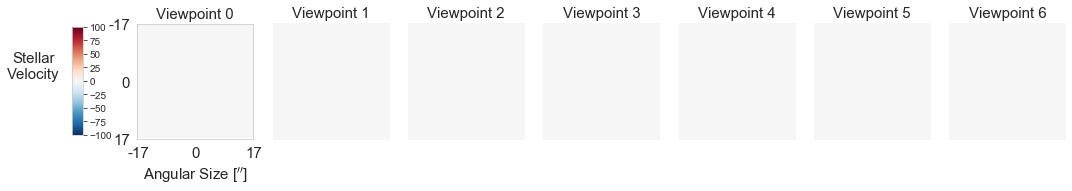

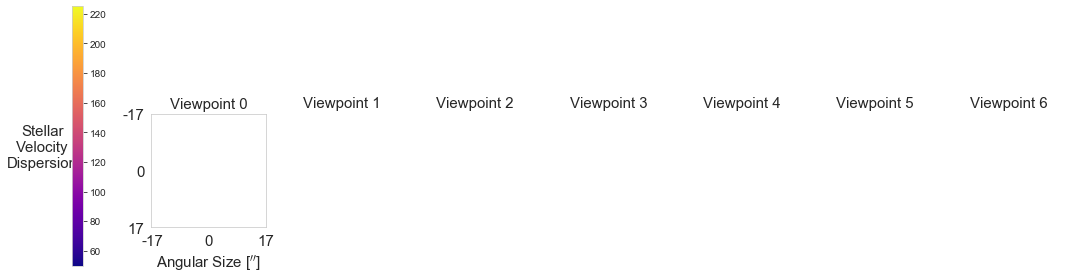

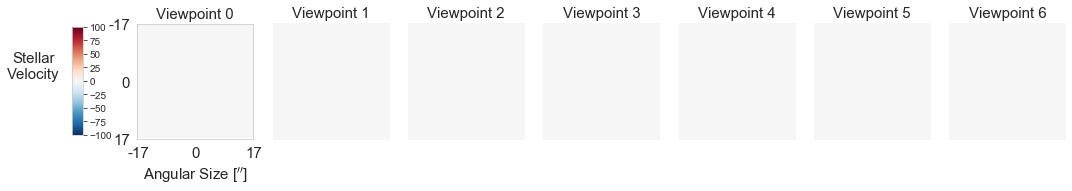

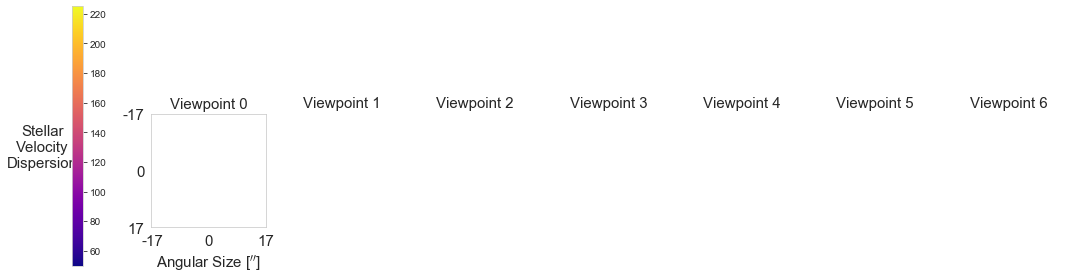

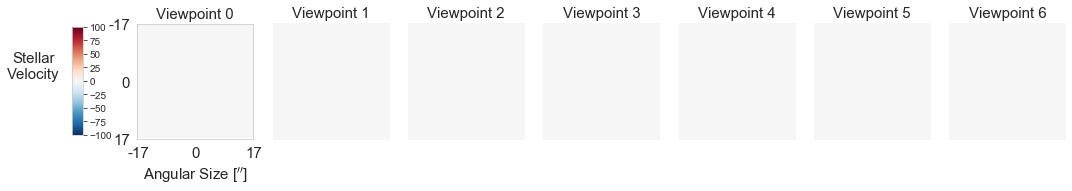

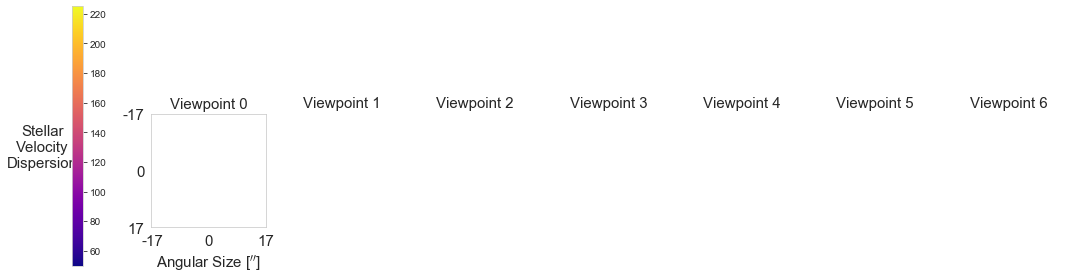

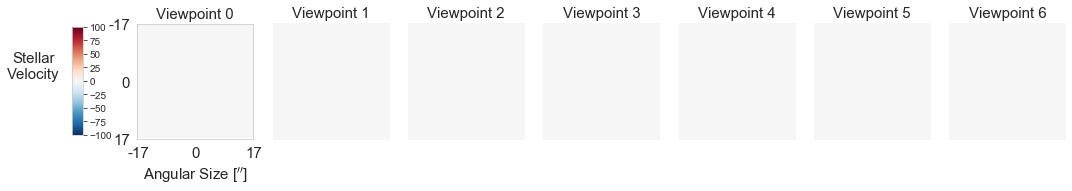

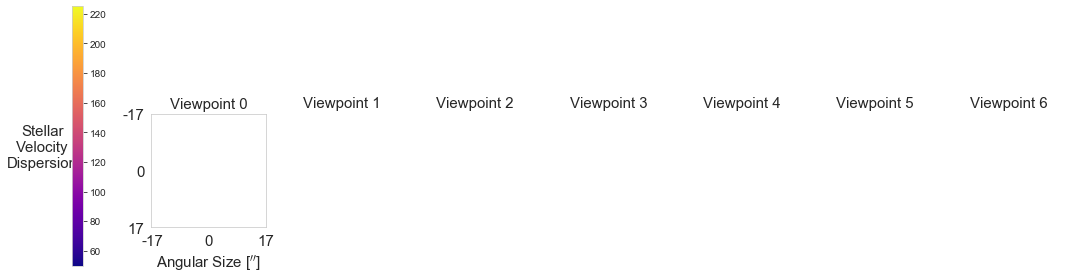

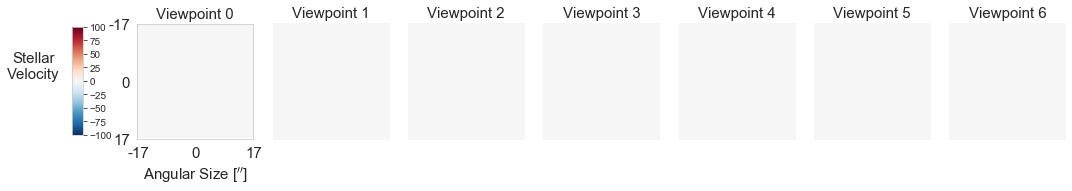

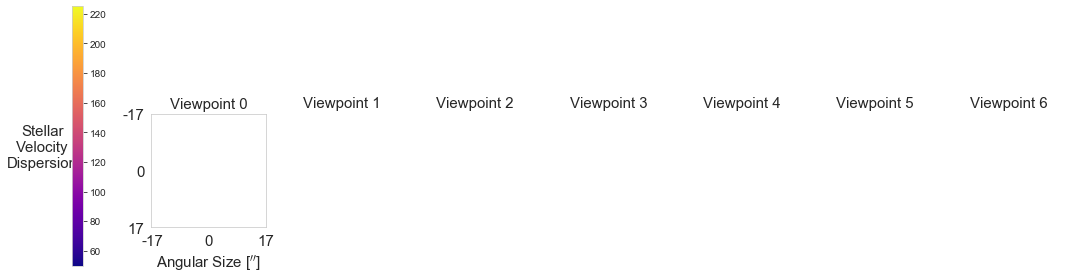

In [281]:
# This code creates all of the .png images, so I can only run it from my machine because it links to the
# kinematic cubes, which are somewhat large ('../kinematic_maps/kinematics...') and I don't want them
# on my Github

from astropy.io import fits
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
# Step to make velocity plots
myr_list=[170,180,185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260,265,275,285, 295,305,311, 315,320,    5,10,20,30,40,60,80,100,120,140,160]
# You are going to save these to your github page so that you can have an html link to them?
#myr = 210
#myr_list=[195,205,210]
myr_list=[5,10,20,30,40,50,60,100,200]
myr_list=[5, 10, 30, 50, 200]
run='fg3_m12_iso0.5'
view_list=[0,1,2,3,4,5,6]
degraded = 'degraded'

#myr_list=[170]


for i in range(len(myr_list)):
    myr = myr_list[i]
    fig, axs = plt.subplots(1,7, figsize=(15, 2.5), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = 0, wspace=.2)

    axs = axs.ravel()
    for j in range(len(view_list)):
        view = view_list[j]
        try:
            kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
            
        except FileNotFoundError:
            #could just be missing a viewpoint
            #so just construct a fake file
            fake = np.zeros((67,67))
            print('missing this viewpoint', j)
            if j ==0:
                im = axs[j].imshow(fake, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-100, vmax=100))
            
                axs[j].set_xticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
                axs[j].set_yticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
                axs[j].set_xticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])
                axs[j].set_yticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])
                axs[j].set_xlabel('Angular Size [$^{\prime\prime}$]', size=15)
                axs[j].tick_params(axis='both', which='major', labelsize=15)
                axs[j].set_ylabel('Stellar\nVelocity', size=15, rotation=0, labelpad=75)
                cbaxes = fig.add_axes([0.07, 0.28, 0.01, 0.60]) 
                cb = plt.colorbar(im, cax = cbaxes)#,fraction=0.046, pad=0.04) 
            else:
                axs[j].axis('off')
                axs[j].imshow(fake, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-100, vmax=100))
                axs[j].axis('off')
            axs[j].set_title('Viewpoint '+str(j), size=15)
            continue
        vel = np.ma.masked_where(kin_cube[1].data==0, kin_cube[1].data)

        if j ==0:
            im = axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-100, vmax=100))
            axs[j].set_xticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
            axs[j].set_yticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
            axs[j].set_xticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])
            axs[j].set_yticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])

            # Now adding the colorbar
            cbaxes = fig.add_axes([0.07, 0.28, 0.01, 0.60]) 
            cb = plt.colorbar(im, cax = cbaxes)#,fraction=0.046, pad=0.04) 
            #plt.colorbar(im)
            axs[j].set_xlabel('Angular Size [$^{\prime\prime}$]', size=15)
            axs[j].tick_params(axis='both', which='major', labelsize=15)
            axs[j].set_ylabel('Stellar\nVelocity', size=15, rotation=0, labelpad=75)
        else:
            axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-100, vmax=100))
            axs[j].axis('off')
        axs[j].set_title('Viewpoint '+str(j), size=15)
        #plt.colorbar(im)
    plt.tight_layout()
    plt.savefig(str(run)+'_panels_'+str(degraded)+'/velocity_panel_'+str(run)+'_'+str(myr)+'.png', dpi=1000, bbox_to_inches='tight')
    
    # Also make a diagram for stellar velocity dispersion
    fig, axs = plt.subplots(1,7, figsize=(15, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.2)

    axs = axs.ravel()
    for j in range(len(view_list)):
        view = view_list[j]
        try:
            kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run)+'_'+str(myr)+'_'+str(view)+'_'+str(degraded)+'.fits')
            
        except FileNotFoundError:
            #could just be missing a viewpoint
            #so just construct a fake file
            fake = np.zeros((67,67))
            print('missing this viewpoint', j)
            if j ==0:
                im = axs[j].imshow(np.ma.masked_where(fake==0, fake), cmap='plasma', vmin=50, vmax=225)#, norm=matplotlib.colors.LogNorm(vmin=10, vmax=300))
            
                axs[j].set_xticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
                axs[j].set_yticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
                axs[j].set_xticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])
                axs[j].set_yticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])
                axs[j].set_xlabel('Angular Size [$^{\prime\prime}$]', size=15)
                axs[j].tick_params(axis='both', which='major', labelsize=15)
                axs[j].set_ylabel('Stellar\nVelocity\nDispersion', size=15, rotation=0, labelpad=80)
                
                cbaxes = fig.add_axes([0.07, 0.28, 0.01, 0.60]) 
                cb = plt.colorbar(im, cax = cbaxes)#,fraction=0.046, pad=0.04) 
            else:
                axs[j].axis('off')
                axs[j].imshow(np.ma.masked_where(fake==0, fake), cmap='plasma',norm=matplotlib.colors.LogNorm(vmin=10, vmax=300))
                axs[j].axis('off')
            axs[j].set_title('Viewpoint '+str(j), size=15)
            continue
        vel = np.ma.masked_where(kin_cube[1].data==0, kin_cube[3].data)

        if j ==0:
            im = axs[j].imshow(vel,  cmap='plasma', vmin=50, vmax=225)#norm=matplotlib.colors.LogNorm(vmin=10, vmax=300))
            axs[j].set_xticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
            axs[j].set_yticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
            axs[j].set_xticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])
            axs[j].set_yticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])

            # Now adding the colorbar
            cbaxes = fig.add_axes([0.07, 0.28, 0.01, 0.60]) 
            cb = plt.colorbar(im, cax = cbaxes)#,fraction=0.046, pad=0.04) 
            #plt.colorbar(im)
            axs[j].set_xlabel('Angular Size [$^{\prime\prime}$]', size=15)
            axs[j].tick_params(axis='both', which='major', labelsize=15)
            axs[j].set_ylabel('Stellar\nVelocity\nDispersion', size=15, rotation=0, labelpad=80)
        else:
            axs[j].imshow(vel, cmap='plasma', vmin=50, vmax=225)#, norm=matplotlib.colors.LogNorm(vmin=10, vmax=300))
            axs[j].axis('off')
        axs[j].set_title('Viewpoint '+str(j), size=15)
        #plt.colorbar(im)
    plt.tight_layout()
    plt.savefig(str(run)+'_panels_'+str(degraded)+'/velocity_disp_panel_'+str(run)+'_'+str(myr)+'.png', dpi=1000, bbox_to_inches='tight')

In [31]:
# Okay so there are three main aspects that I'd like to see with this interactive fig - 

# First I'd like to display all plots for all viewpoints for a moment in time, and the real challenge
# is that I'd like to display these .png images below the main figure, not just as a hover tool feature

# Second, I'd like to be able to togle through the different mountain plots for each simulation
# (this doesn't seem too hard to do)

# Third, I'd like to display using some sort of a tap select or hover the LDA value at each moment in time
# on the top plot (this is done)

In [32]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import Band
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import Title
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label, Circle, CustomJS
from bokeh.models import Arrow, OpenHead, NormalHead, VeeHead
from bokeh.models import Span
from bokeh.models import Range1d
from bokeh.layouts import gridplot
from bokeh.models import HoverTool 

In [15]:
output_notebook()

Loading BokehJS ...

In [33]:
# This is the code for creating hte mountin.html plot that is on my website
# I would like to modify it to 
output_file("mountin.html")


print('sorted inputs', sortedinput)
sort_coef = significant_coef
sort_std = significant_std
print('coeff', sort_coef )
print('std', sort_std)
sortedinput=significant_term

LDA_act = []
LDA_l = []
up = []
low = []
img_list = []
img_disp_list = []

myr_list = [40,60,80,100,120,140,160,170,180,185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260,265]
myr_list_sorted_left = [5,10,20,30,40,50,60,100,200]
myr_list_sorted_right = [275,285,295,305,311,315,320]

# Okay but the trick is that for the early-stage isolated galaxies they are a combination
# of two different merger simulations AND the early-stage (pre-pericentric passage) mergers
# So you'll need to show multiple maps
# 5,10,20,30 from the merger
# #myr_list=[5,10,20,30,40,50,60,100,200] from iso1
#myr_list=[5, 10, 30, 50, 200] from iso0.5


myr_list_sorted = sorted(myr_list)


#myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, 1.96, 2.69, 2.79, 3.62, 4.6, 5.18, 5.57, 6.06]
#myr_list=[170,180,185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260,265,275,285, 295,305,311, 315,320]



for j in range(len(myr_here)):
    LDA_act.append(str(round(sort_coef[-1]*input_1_means[j],1))+' + '+str(round(sort_coef[-2]*input_2_means[j],1))+' + '+str(round(sort_coef[-3]*input_3_means[j],1))+' + ... + '+str(round(list_inter[new_min_index][0],1)))
    LDA_l.append(str(round(sort_coef[-1],1))+' '+sortedinput[-1]+' + '+str(round(sort_coef[-2],1))+' '+sortedinput[-2]+' + '+str(round(sort_coef[-3],1))+' '+sortedinput[-3]+' + ... + '+str(round(list_inter[new_min_index][0],1)))
    up.append(new_means[j]+std[j])
    low.append(new_means[j]-std[j])
    img_disp_list.append('https://github.com/beckynevin/interactive_figs/fg3_m12_panels/velocity_disp_panel_fg3_m12_'+str(myr_list_sorted[j])+'.png?raw=true')
    img_list.append('https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_panel_fg3_m12_'+str(myr_list_sorted[j])+'.png?raw=true')

up_left=[]
low_left=[]
LDA_act_left=[]
LDA_l_left=[]
img_disp_list_left=[]
img_list_left=[]
img_list_left_alt=[]
img_list_left_alt_2=[]
for j in range(len(myr_here_non_left)):
    LDA_act_left.append(str(round(sort_coef[-1]*input_1_means_non[j],1))+' + '+str(round(sort_coef[-2]*input_2_means_non[j],1))+' + '+str(round(sort_coef[-3]*input_3_means_non[j],1))+' + ... + '+str(round(list_inter[new_min_index][0],1)))
    LDA_l_left.append(str(round(sort_coef[-1],1))+' '+sortedinput[-1]+' + '+str(round(sort_coef[-2],1))+' '+sortedinput[-2]+' + '+str(round(sort_coef[-3],1))+' '+sortedinput[-3]+' + ... + '+str(round(list_inter[new_min_index][0],1)))
    up_left.append(new_means_non_left[j]+std_non_left[j])
    low_left.append(new_means_non_left[j]-std_non_left[j])
    img_disp_list_left.append('https://github.com/beckynevin/interactive_figs/fg3_m12_panels/velocity_disp_panel_fg3_m12_'+str(myr_list_sorted_left[j])+'.png?raw=true')
    if myr_list_sorted_left[j]<40:
        try:
            img_list_left.append('https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_panel_fg3_m12_'+str(myr_list_sorted_left[j])+'.png?raw=true')
        except:
            img_list_left.append(0)
    else:
        img_list_left.append(0)
    try:
        img_list_left_alt.append('https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_iso1_panels_degraded/velocity_panel_fg3_m12_'+str(myr_list_sorted_left[j])+'.png?raw=true')
    except:
        img_list_left_alt.append(0)
    try:
        img_list_left_alt_2.append('https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_iso0.5_panels_degraded/velocity_panel_fg3_m12_'+str(myr_list_sorted_left[j])+'.png?raw=true')
    except:
        img_list_left_alt_2.append(0)
    
    
up_right=[]
low_right=[]
LDA_act_right=[]
LDA_l_right=[]
img_disp_list_right=[]
img_list_right=[]
for j in range(len(myr_here_non_right)):
    LDA_act_right.append(str(round(sort_coef[-1]*input_1_means_non[len(myr_here_non_left):][j],1))+' + '+str(round(sort_coef[-2]*input_2_means_non[len(myr_here_non_left):][j],1))+' + '+str(round(sort_coef[-3]*input_3_means_non[len(myr_here_non_left):][j],1))+' + ... + '+str(round(list_inter[new_min_index][0],1)))
    LDA_l_right.append(str(round(sort_coef[-1],1))+' '+sortedinput[-1]+' + '+str(round(sort_coef[-2],1))+' '+sortedinput[-2]+' + '+str(round(sort_coef[-3],1))+' '+sortedinput[-3]+' + ... + '+str(round(list_inter[new_min_index][0],1)))
    up_right.append(new_means_non_right[j]+std_non_right[j])
    low_right.append(new_means_non_right[j]-std_non_right[j])
    img_disp_list_right.append('https://github.com/beckynevin/interactive_figs/fg3_m12_panels/velocity_disp_panel_fg3_m12_'+str(myr_list_sorted_right[j])+'.png?raw=true')
    img_list_right.append('https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_panel_fg3_m12_'+str(myr_list_sorted_right[j])+'.png?raw=true')

source = ColumnDataSource(data=dict(myr_name_list=myr_list_sorted,
    x=myr_here,
    y=new_means,
    upper=up,
    lower=low,
    desc=myr_here,
    LDA_list=LDA_l,
    LDA_actual=LDA_act,
    imgs=img_list,
    imgs_disp = img_disp_list))

source1 = ColumnDataSource(data=dict(myr_name_list=myr_list_sorted_left,
    x1=myr_here_non_left,
    y1=new_means_non_left,
    upper_l = up_left,
    lower_l = low_left,
    desc=myr_here_non_left,
    LDA_list_left=LDA_l_left,
    LDA_actual_left=LDA_act_left,
    imgs_left=img_list_left,
    imgs_left_alt = img_list_left_alt,
    imgs_left_alt_2 = img_list_left_alt_2,
    imgs_disp_left = img_disp_list_left))

source2 = ColumnDataSource(data=dict(myr_name_list=myr_list_sorted_right,
    x2=myr_here_non_right,
    y2=new_means_non_right,
    upper_r = up_right,
    lower_r = low_right,
    desc=myr_here_non_right,
    LDA_list_right=LDA_l_right,
    LDA_actual_right=LDA_act_right,
    imgs_right=img_list_right,
    imgs_disp_right = img_disp_list_right))

TOOLTIPS = """
    <div>
        
            <img
                src="@imgs" height="120" alt="@imgs" width="700"
                style="float: center; margin: 0px 15px 15px 0px;"
            ></img>
        
        <div>
            <span style="font-size: 17px; font-weight: bold;">LD1 = @LDA_list</span>
        </div>
        <div>
        <span style="font-size: 17px; font-weight: bold;">@y = @LDA_actual</span>
        </div>
        
      
    </div>
"""

TOOLTIPS1 = """
    <div>
        
            <img
                src="@imgs_left" height="120" alt="No fg3_m12" width="700"
                style="float: center; margin: 0px 15px 15px 0px;"
            ></img>
        
        <div>
        <img
                src="@imgs_left_alt" height="120" alt="No fg3_m12_iso1" width="700"
                style="float: center; margin: 0px 15px 15px 0px;"
            ></img>
        <div>
        <img
                src="@imgs_left_alt_2" height="120" alt="No fg3_m12_iso0.5" width="700"
                style="float: center; margin: 0px 15px 15px 0px;"
            ></img>
        <div>
            <span style="font-size: 17px; font-weight: bold;">LD1 = @LDA_list_left</span>
        </div>
        <div>
        <span style="font-size: 17px; font-weight: bold;">@y1 = @LDA_actual_left</span>
        </div>
        
    </div>
"""

TOOLTIPS2 = """
    <div>
        
            <img
                src="@imgs_right" height="120" alt="@imgs_right" width="700"
                style="float: center; margin: 0px 15px 15px 0px;"
            ></img>
        
        <div>
            <span style="font-size: 17px; font-weight: bold;">LD1 = @LDA_list_right</span>
        </div>
        <div>
        <span style="font-size: 17px; font-weight: bold;">@y2 = @LDA_actual_right</span>
        </div>
        
    </div>
"""


p = figure(plot_width=1300, plot_height=400,background_fill_color='#bdbcbd')#, tooltips=TOOLTIPS)
#p = figure(tools="wheel_zoom,reset", match_aspect=True, )
p.xgrid[0].grid_line_color=None
p.ygrid[0].grid_line_alpha=0.5

# Vertical line
vline1 = Span(location=early, dimension='height', line_color='black', line_width=2,line_dash='dashed')
vline2 = Span(location=coalescence, dimension='height', line_color='black', line_width=2,line_dash='dashed')
vline3 = Span(location=coalescence+0.5, dimension='height', line_color='black', line_width=2,line_dash='dashed')

# Horizontal line
hline = Span(location=mean_non, dimension='width', line_color='black', line_width=2)

p.renderers.extend([vline1, vline2, vline3, hline])


p.line('x', 'y', color='red', source=source, legend_label='Merger')

#r0_invisible = Circle(x='x', y='y', fill_color='gray', fill_alpha = 0.05, size=7)#, legend_label='Merger',source=source,hover_fill_color='red', hover_alpha=1)#, zorder=100)
#r0_visible = Circle(x='x', y='y', fill_color='red', size=7, fill_alpha=0.5)#,source=source,hover_fill_color='red', hover_alpha=1)#, zorder=100)
#r0 = p.add_glyph(source, r0_invisible, selection_glyph = r0_visible, nonselection_glyph=r0_invisible)
r0 = p.circle('x', 'y', fill_color='red', size=7, line_color='white', source=source, legend_label='Merger',hover_fill_color='red', hover_alpha=1)#, zorder=100)
p.add_tools(HoverTool(renderers=[r0], tooltips=TOOLTIPS))











p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
    
band = Band(base='x', lower='lower', upper='upper', source = source ,level='underlay',
            fill_alpha=0.25, line_width=0, fill_color='red')
p.add_layout(band)


p.line('x1', 'y1', color='blue', source=source1, legend_label='Nonmerger')
r1 = p.circle('x1','y1', fill_color='blue', line_color='white', size=7, source=source1, legend_label='Nonmerger')
band = Band(base='x1', lower='lower_l', upper='upper_l', source = source1 ,level='underlay',
            fill_alpha=0.25, line_width=0, fill_color='blue')
p.add_layout(band)

p.add_tools(HoverTool(renderers=[r1], tooltips=TOOLTIPS1))


p.line('x2','y2', color='blue', source=source2)
r2 = p.circle('x2','y2', fill_color='blue', line_color='white', size=7, source=source2)
band = Band(base='x2', lower='lower_r', upper='upper_r', source = source2 ,level='underlay',
            fill_alpha=0.25, line_width=0, fill_color='blue')
p.add_layout(band)

p.add_tools(HoverTool(renderers=[r2], tooltips=TOOLTIPS2))
#axes.set_xlim([min([min(myr_non),min(myr)]),max([max(myr_non),max(myr)])]) 

ymax =  max(new_means+std)
ymin = min(min(new_means_non_left-std_non_left),min(new_means_non_right-std_non_right))
    
p.x_range=Range1d(min(myr_here_non_left), max(myr_here_non_right))
p.y_range=Range1d(min(min(new_means_non_left-std_non_left),min(new_means_non_right-std_non_right)), max(new_means+std))


#labels = LabelSet(x='x', y='y', text='x', level='glyph',
#              x_offset=5, y_offset=5, source=source, render_mode='canvas')

peri = Label(x=myr_here[0], y=ymax-1, x_units='data', y_units='data',
                 text='First Pericentric Passage', render_mode='css',
                 border_line_color='black', border_line_alpha=0.0,
                 background_fill_color='white', background_fill_alpha=0.0)
coal = Label(x=coalescence+0.03, y=ymax-1, x_units='data', y_units='data',
                 text='Coalescence', render_mode='css',
                 border_line_color='black', border_line_alpha=0.0,
                 background_fill_color='white', background_fill_alpha=0.0)

# Now all the merger stages labels, maybe place them down below?
PC = Label(x=coalescence+0.03, y=ymax-0.5, x_units='data', y_units='data',
                 text='Post-Coalescence', render_mode='css',
                 border_line_color='black', border_line_alpha=0.20,
                 background_fill_color='red', background_fill_alpha=0.4)

L = Label(x=early+0.1, y=ymax-0.5, x_units='data', y_units='data',
                 text='Late', render_mode='css',
                 border_line_color='black', border_line_alpha=0.3,
                 background_fill_color='red', background_fill_alpha=0.4)

E = Label(x=early-0.3, y=ymax-0.5, x_units='data', y_units='data',
                 text='Early', render_mode='css',
                 border_line_color='black', border_line_alpha=0.3,
                 background_fill_color='red', background_fill_alpha=0.4)


p.add_layout(Arrow(end=VeeHead(size=10), line_color="black",
                   x_start=myr_here[0], y_start=ymax-1, x_end=myr_here[0], y_end=new_means[0]+0.2))
p.add_layout(Arrow(end=VeeHead(size=10), line_color="black",
                   x_start=coalescence+0.03, y_start=ymax-1, x_end=coalescence, y_end=new_means[coal_i][0]+0.2))
p.add_layout(Title(text="Merger Timeline [Gyr]", align="center"), "below")
p.add_layout(Title(text="LD1", align="center"), "left")

#p.add_layout(labels)
p.add_layout(peri)
p.add_layout(coal)
p.add_layout(PC)
p.add_layout(E)
p.add_layout(L)

empty = figure(plot_width=1300, plot_height=400,background_fill_color='white',x_range=(0,1), y_range=(0,1))
empty.image_url(url='imgs', x=0, y=1, w=0.9, h=0.5, source=source)
#empty.image_url(url=['https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_disp_panel_fg3_m12_@myr_name_list.png?raw=true'], x=0, y=0.75, w=0.5, h=0.8)


#div_image = empty.image_url(url=['https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_disp_panel_fg3_m12_10.png?raw=true'], x=0, y=0.75, w=0.5, h=0.8)

#def update(pokemon_number=10):
#    div_image.text = """<img src="https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_disp_panel_fg3_m12_{}.png?raw=true" alt="div_image">""".format(pokemon_number)
#    push_notebook()


#interact(update, pokemon_number=myr_here)
empty.xgrid[0].grid_line_color=None
empty.ygrid[0].grid_line_alpha=0.0
empty.axis.visible = False



#div_image = Div(text="""<img src="https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/1.png" alt="div_image">""", width=200, height=200)#

#def update(pokemon_number=1):
#    div_image.text = """<img src="https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/{}.png" alt="div_image">""".format(pokemon_number)
#    push_notebook()

#show(div_image, notebook_handle=True)

#interact(update, pokemon_number=[1, 4, 7])

myrs = [1,4,7]

#p1.select(TapTool).callback = CustomJS(code = update)#args = {'r1': r1}, 


p1 = gridplot([p, empty], ncols=1)

tab1 = Panel(child=p1, title=r'q = 0.5, fg = 0.3')
tabs = Tabs(tabs=[tab1])


'''show(tabs, notebook_handle=True)

interact(update, pokemon_number=[10, 40, 70])'''

show(tabs) # show the results




sorted inputs ['va*resids' 'resids' 's_asym' 'resids*lambdar' 'deltapos2' 'A_2'
 'epsilon' 'v_asym' 'A2*deltapos2' 'Delta PA' 'dPA*epsilon'
 'epsilon*deltapos2' 'deltapos' 'lambda_r' 'lambdar*deltapos']
coeff [0.28279290533151186, 0.4223874524079271, 0.48737999295655615, 0.5296732309558875, -0.5443644733740783, -0.7024455939206405, 0.7561254885309853, 0.7724741699578661, 1.4305936775452417, -1.4574524941951412, -1.788873583646313]
std [0.06925144181776803, 0.07648819603360335, 0.09476253738032026, 0.06691209911445462, 0.12370745855125516, 0.08021356836052301, 0.04905409120403274, 0.1351877118479705, 0.359411528671858, 0.18445744633333816, 0.3569859243583975]
these should be the images on the left
https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels_degraded/velocity_panel_fg3_m12_5.png?raw=true
these should be the images on the left
https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels_degraded/velocity_panel_fg3_m12_10.png?raw=true
these should

In [ ]:
# The rest of this notebook are other people's examples

In [ ]:
# The way this would work would be to use a callback:
s1.callback = CustomJS(args=dict(s2=s2), code="""
        var inds = cb_obj.get('selected')['1d'].indices;
        var d1 = cb_obj.get('data');
        var d2 = s2.get('data');
        d2['x'] = []
        d2['y'] = []
        for (i = 0; i < inds.length; i++) {
            d2['x'].push(d1['x'][inds[i]])
            d2['y'].push(d1['y'][inds[i]])
        }
        s2.trigger('change');
    """)

layout = hplot(p1, p2)


In [129]:


output_file("toolbar.html")

source = ColumnDataSource(data=dict(
    x=[1, 2, 3, 4, 5],
    y=[2, 5, 8, 2, 7],
    desc=['A', 'b', 'C', 'd', 'E'],
    imgs=[
        'https://drive.google.com/file/d/0B7TzwIvKos1gWVNuWWxKOTFDX2s/view?usp=sharing',
        'https://bokeh.pydata.org/static/snake2.png',
        'https://bokeh.pydata.org/static/snake3D.png',
        'https://bokeh.pydata.org/static/snake4_TheRevenge.png',
        'https://bokeh.pydata.org/static/snakebite.jpg'
    ],
    fonts=[
        '<i>italics</i>',
        '<pre>pre</pre>',
        '<b>bold</b>',
        '<small>small</small>',
        '<del>del</del>'
    ]
))


TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="42" alt="@imgs" width="42"
                style="float: left; margin: 0px 100px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">[$index]</span>
        </div>
        <div>
            <span>@fonts{safe}</span>
        </div>
        <div>
            <span style="font-size: 15px;">Location</span>
            <span style="font-size: 10px; color: #696;">($x, $y)</span>
        </div>
    </div>
"""

p = figure(plot_width=400, plot_height=400, tooltips=TOOLTIPS,
           title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)

show(p)

In [289]:
import pandas as pd
import numpy as np
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.layouts import row
from bokeh.io import curdoc
from random import sample


# data for plot 2
df2 = pd.DataFrame({"A" : sample(np.linspace(10, 20, 10),5),
                    "B" : sample(np.linspace(20, 30, 10),5),
                    "C" : sample(np.linspace(30, 40, 10),5),
                    "D" : sample(np.linspace(40, 50, 10),5),
                    "E" : sample(np.linspace(50, 60, 10),5),})
source2 = ColumnDataSource(
        data=dict(
            x=list(df2.index.values),
            y=list(df2.iloc[:,0].values)
        )
    )

# data for plot 1
df1 = np.mean(df2)
source1 = ColumnDataSource(
        data=dict(
            x=list(range(0,df1.shape[0])),
            y=list(df1.values),
            colnames = list(df1.index.values)
        )
    )

# Plot graph one with data from df1 and source 1 as barplot
plot1 = figure(plot_height=300, plot_width=400, tools="tap")
barglyph = plot1.vbar(x='x',top='y',source=source1, bottom=0,width =0.5)


# Plot graph two with data from df2 and source 2 as line
plot2 = figure(plot_height=300, plot_width=400, title="myvalues", 
              tools="crosshair,box_zoom,reset,save,wheel_zoom,hover")    
r1 = plot2.line(x='x',y='y',source =source2, line_alpha = 1, line_width=1)
# safe data from plot 2 for later change in subroutine
ds1 = r1.data_source

def callback(attr, old, new):
    patch_name =  source1.data['colnames'][new['1d']['indices'][0]]
    ds1.data['y'] = df2[patch_name].values
    print("TapTool callback executed on Patch {}".format(patch_name))

# add taptool to plot1
barglyph.data_source.on_change('selected',callback)

curdoc().add_root(row(plot1,plot2))

TypeError: Population must be a sequence or set.  For dicts, use list(d).

In [288]:
from bokeh.layouts import row
from bokeh.models import ColumnDataSource, CustomJS, TapTool
from bokeh.plotting import figure, show
import numpy as np

source_bars = ColumnDataSource({'x': [1, 2, 3], 'y': [2, 4, 1] , 'colnames': ['A', 'B', 'C']})
lines_y = [np.random.random(5) for i in range(3)]

plot1 = figure(tools = 'tap')
bars = plot1.vbar(x = 'x', top = 'y', source = source_bars, bottom = 0, width = 0.5)

plot2 = figure()
lines = plot2.line(x = 'x', y = 'y', source = ColumnDataSource({'x': np.arange(5), 'y': lines_y[0]}))
lines.visible = False

code = '''if (cb_data.source.selected.indices.length > 0){
            lines.visible = true;
            selected_index = cb_data.source.selected.indices[0];
            lines.data_source.data['y'] = lines_y[selected_index]
            lines.data_source.change.emit(); 
          }'''

plots = row(plot1, plot2)
plot1.select(TapTool).callback = CustomJS(args = {'lines': lines, 'lines_y': lines_y}, code = code)
show(plots)

In [147]:
from ipywidgets import interact
from bokeh.io import output_notebook, show, push_notebook
from bokeh.models.widgets import Div

output_file('pokemon.html')
output_notebook()
div_image = Div(text="""<img src="https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/1.png" alt="div_image">""", width=200, height=200)

def update(pokemon_number=1):
    div_image.text = """<img src="https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/{}.png" alt="div_image">""".format(pokemon_number)
    push_notebook()

show(div_image, notebook_handle=True)

interact(update, pokemon_number=[1, 4, 7])

Loading BokehJS ...

interactive(children=(Dropdown(description='pokemon_number', options=(1, 4, 7), value=1), Output()), _dom_clas…

<function __main__.update(pokemon_number=1)>

In [166]:
# Maybe try to do this for your own 

from ipywidgets import interact

from bokeh.io import output_notebook, show, push_notebook
from bokeh.models.widgets import Div

#output_notebook()
div_image = Div(text="""<img src="https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_disp_panel_fg3_m12_195.png?raw=true" alt="div_image">""", width=1000, height=400)

def update(pokemon_number=1):
    div_image.text = """<img src="https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_disp_panel_fg3_m12_{}.png?raw=true" alt="div_image">""".format(pokemon_number)
    push_notebook()

show(div_image, notebook_handle=True)

interact(update, pokemon_number=[195, 205])

interactive(children=(Dropdown(description='pokemon_number', options=(195, 205), value=195), Output()), _dom_c…

<function __main__.update(pokemon_number=1)>

In [318]:
from random import random

from bokeh.layouts import row
from bokeh.models import CustomJS, ColumnDataSource
from bokeh.plotting import figure, output_file, show

output_file("callback.html")

x = [random() for x in range(500)]
y = [random() for y in range(500)]

s1 = ColumnDataSource(data=dict(x=x, y=y))
p1 = figure(plot_width=400, plot_height=400, tools="lasso_select", title="Select Here")
p1.circle('x', 'y', source=s1, alpha=0.6)

s2 = ColumnDataSource(data=dict(x=[], y=[]))
p2 = figure(plot_width=400, plot_height=400, x_range=(0, 1), y_range=(0, 1),
            tools="", title="Watch Here")
p2.circle('x', 'y', source=s2, alpha=0.6)

s1.selected.js_on_change('indices', CustomJS(args=dict(s1=s1, s2=s2), code="""
        var inds = cb_obj.indices;
        var d1 = s1.data;
        var d2 = s2.data;
        d2['x'] = []
        d2['y'] = []
        for (var i = 0; i < inds.length; i++) {
            d2['x'].push(d1['x'][inds[i]])
            d2['y'].push(d1['y'][inds[i]])
        }
        s2.change.emit();
    """)
)

layout = row(p1, p2)

show(layout)